<div class="markdown-google-sans" style="text-align: center; max-width: 600px; margin: auto;">
  
  # <b><span style='color:#E1B12D'>Data Pre-Processing [STAGE2] </span></b>
  ## BLI DATA

  ---
  
  <span style="color:#27AE60; font-size: 1.2em;"><b>Febriyan Chandra</b></span> — Project Manager  
  <span style="color:#2980B9; font-size: 1.2em;"><b>Ramadani Saputra</b></span> — Data Engineer  
  <span style="color:#8E44AD; font-size: 1.2em;"><b>I Putu Ferry Wistika</b></span> — Data Scientist   

</div>


# **Import Library**

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Tampilkan semua kolom (agar tidak di-truncate)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.6f}'.format)


# **Ekstraksi Data**

In [3]:
# Ekstraksi data
raw_data = pd.read_csv('full_data_ecommerce.csv')

# Tampilkan sampel data
raw_data.head()

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_city,seller_state,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.000000,87285b34884572647811a353c7ac498a,Housewares,40.000000,268.000000,4.000000,500.000000,19.000000,8.000000,13.000000,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh,a54f0611adc9ed256b57ede6b6eb5114,4.000000,2017-10-11,2017-10-12 03:43:00,2.000000,voucher,1.000000,18.590000,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.000000,87285b34884572647811a353c7ac498a,Housewares,40.000000,268.000000,4.000000,500.000000,19.000000,8.000000,13.000000,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh,a54f0611adc9ed256b57ede6b6eb5114,4.000000,2017-10-11,2017-10-12 03:43:00,3.000000,voucher,1.000000,2.000000,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.000000,87285b34884572647811a353c7ac498a,Housewares,40.000000,268.000000,4.000000,500.000000,19.000000,8.000000,13.000000,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh,a54f0611adc9ed256b57ede6b6eb5114,4.000000,2017-10-11,2017-10-12 03:43:00,1.000000,credit_card,1.000000,18.120000,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,1.000000,595fac2a385ac33a80bd5114aec74eb8,Perfumery,29.000000,178.000000,1.000000,400.000000,19.000000,13.000000,19.000000,289cdb325fb7e7f891c38608bf9e0962,Anantapur,Andhra Pradesh,8d5266042046a06655c8db133d120ba5,4.000000,2018-08-08,2018-08-08 18:37:00,1.000000,UPI,1.000000,141.460000,-12.169860,-44.988369,Pandariya,Chhattisgarh
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,1.000000,aa4383b373c6aca5d8797843e5594415,Auto,46.000000,232.000000,1.000000,420.000000,24.000000,19.000000,21.000000,4869f7a5dfa277a7dca6462dcf3b52b2,Freelandgunj,Gujarat,e73b67b67587f7644d5bd1a52deb1b01,5.000000,2018-08-18,2018-08-22 19:07:00,1.000000,credit_card,3.000000,179.120000,-16.746337,-48.514624,Dhamdha,Chhattisgarh


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118492 entries, 0 to 118491
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118492 non-null  object 
 1   customer_id                    118492 non-null  object 
 2   customer_unique_id             118492 non-null  object 
 3   customer_zip_code_prefix       118492 non-null  int64  
 4   customer_city                  118492 non-null  object 
 5   customer_state                 118492 non-null  object 
 6   order_status                   118492 non-null  object 
 7   order_purchase_timestamp       118492 non-null  object 
 8   order_approved_at              118316 non-null  object 
 9   order_delivered_carrier_date   116425 non-null  object 
 10  order_delivered_customer_date  115102 non-null  object 
 11  order_estimated_delivery_date  118492 non-null  object 
 12  order_item_id                 

In [5]:
# Mengecek duplikat di setiap kolom
for column in raw_data.columns:
    column_duplicates = raw_data[column].duplicated().sum()
    print(f'Jumlah duplikat di kolom "{column}": {column_duplicates}')

# Mengecek duplikat keseluruhan untuk seluruh baris (jika ingin)
total_duplicates = raw_data.duplicated().sum()
print(f'Jumlah duplikat keseluruhan di seluruh baris: {total_duplicates}')

# Menghitung persentase duplikat
duplicate_percentage = (total_duplicates / len(raw_data)) * 100
print(f'Persentase duplikat: {duplicate_percentage:.2f}%')


Jumlah duplikat di kolom "order_id": 19329
Jumlah duplikat di kolom "customer_id": 19329
Jumlah duplikat di kolom "customer_unique_id": 22664
Jumlah duplikat di kolom "customer_zip_code_prefix": 103655
Jumlah duplikat di kolom "customer_city": 114418
Jumlah duplikat di kolom "customer_state": 118472
Jumlah duplikat di kolom "order_status": 118484
Jumlah duplikat di kolom "order_purchase_timestamp": 29922
Jumlah duplikat di kolom "order_approved_at": 68116
Jumlah duplikat di kolom "order_delivered_carrier_date": 57048
Jumlah duplikat di kolom "order_delivered_customer_date": 42997
Jumlah duplikat di kolom "order_estimated_delivery_date": 118033
Jumlah duplikat di kolom "order_item_id": 118470
Jumlah duplikat di kolom "product_id": 85649
Jumlah duplikat di kolom "product_category_name": 118420
Jumlah duplikat di kolom "product_name_length": 118425
Jumlah duplikat di kolom "product_description_length": 115531
Jumlah duplikat di kolom "product_photos_qty": 118472
Jumlah duplikat di kolom "

In [6]:
# Mengecek jumlah duplikat berdasarkan 'order_id'
duplicate_order_count = raw_data['order_id'].duplicated().sum()

# Menghitung persentase duplikat berdasarkan 'order_id'
duplicate_order_percentage = (duplicate_order_count / len(raw_data)) * 100

# Menampilkan hasil
print(f'Jumlah duplikat pada order_id: {duplicate_order_count}')
print(f'Persentase duplikat pada order_id: {duplicate_order_percentage:.2f}%')


Jumlah duplikat pada order_id: 19329
Persentase duplikat pada order_id: 16.31%


In [7]:
raw_data = raw_data.drop_duplicates(subset='order_id')

In [8]:
# Mengecek jumlah duplikat berdasarkan 'order_id'
duplicate_order_count = raw_data['order_id'].duplicated().sum()

# Menghitung persentase duplikat berdasarkan 'order_id'
duplicate_order_percentage = (duplicate_order_count / len(raw_data)) * 100

# Menampilkan hasil
print(f'Jumlah duplikat pada order_id: {duplicate_order_count}')
print(f'Persentase duplikat pada order_id: {duplicate_order_percentage:.2f}%')


Jumlah duplikat pada order_id: 0
Persentase duplikat pada order_id: 0.00%


In [9]:
# Mengonversi kolom yang memiliki '_date' menjadi datetime
date_columns = [col for col in raw_data.columns if '_date' in col]

# Mengonversi kolom-kolom tersebut menjadi datetime
for col in date_columns:
    raw_data[col] = pd.to_datetime(raw_data[col], errors='coerce')

# Mengonversi kolom 'order_purchase_timestamp' menjadi datetime
raw_data['order_purchase_timestamp'] = pd.to_datetime(raw_data['order_purchase_timestamp'], errors='coerce')
raw_data['order_approved_at'] = pd.to_datetime(raw_data['order_approved_at'], errors='coerce')


# Memeriksa tipe data setelah konversi
print(raw_data.dtypes)


order_id                                 object
customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
product_category_name                    object
product_name_length                     float64
product_description_length              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       

In [10]:
raw_data['purchased_approved'] = (raw_data.order_approved_at -raw_data.order_purchase_timestamp).dt.seconds
raw_data['approved_carrier'] = (raw_data.order_delivered_carrier_date - raw_data.order_approved_at).dt.days
raw_data['carrier_delivered'] = (raw_data.order_delivered_customer_date - raw_data.order_delivered_carrier_date).dt.days
raw_data['delivered_estimated'] = (raw_data.order_estimated_delivery_date - raw_data.order_delivered_customer_date).dt.days
raw_data['purchased_delivered'] = (raw_data.order_delivered_customer_date - raw_data.order_purchase_timestamp).dt.days
raw_data.head()

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_city,seller_state,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.000000,87285b34884572647811a353c7ac498a,Housewares,40.000000,268.000000,4.000000,500.000000,19.000000,8.000000,13.000000,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh,a54f0611adc9ed256b57ede6b6eb5114,4.000000,2017-10-11,2017-10-12 03:43:00,2.000000,voucher,1.000000,18.590000,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh,660.000000,2.000000,6.000000,7.000000,8.000000
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,1.000000,595fac2a385ac33a80bd5114aec74eb8,Perfumery,29.000000,178.000000,1.000000,400.000000,19.000000,13.000000,19.000000,289cdb325fb7e7f891c38608bf9e0962,Anantapur,Andhra Pradesh,8d5266042046a06655c8db133d120ba5,4.000000,2018-08-08,2018-08-08 18:37:00,1.000000,UPI,1.000000,141.460000,-12.169860,-44.988369,Pandariya,Chhattisgarh,24180.000000,0.000000,12.000000,5.000000,13.000000
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,1.000000,aa4383b373c6aca5d8797843e5594415,Auto,46.000000,232.000000,1.000000,420.000000,24.000000,19.000000,21.000000,4869f7a5dfa277a7dca6462dcf3b52b2,Freelandgunj,Gujarat,e73b67b67587f7644d5bd1a52deb1b01,5.000000,2018-08-18,2018-08-22 19:07:00,1.000000,credit_card,3.000000,179.120000,-16.746337,-48.514624,Dhamdha,Chhattisgarh,1020.000000,0.000000,9.000000,17.000000,9.000000
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,1.000000,d0b61bfb1de832b15ba9d266ca96e5b0,Pet_Shop,59.000000,468.000000,3.000000,450.000000,30.000000,10.000000,20.000000,66922902710d126a0e7d26b0e3805106,Anantapur,Andhra Pradesh,359d03e676b3c069f62cadba8dd3f6e8,5.000000,2017-12-03,2017-12-05 19:21:00,1.000000,credit_card,1.000000,72.200000,-5.767733,-35.275467,Kartarpur,Punjab,1020.000000,3.000000,9.000000,12.000000,13.000000
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,1.000000,65266b2da20d04dbe00c5c2d3bb7859e,Stationery,38.000000,316.000000,4.000000,250.000000,51.000000,15.000000,15.000000,2c9e548be18521d1c43cde1c582c6de8,Akkayapalle,Andhra Pradesh,e50934924e227544ba8246aeb3770dd4,5.000000,2018-02-17,2018-02-18 13:02:00,1.000000,credit_card,1.000000,28.620000,-23.675037,-46.524784,Bheemavaram,Andhra Pradesh,3720.000000,0.000000,1.000000,9.000000,2.000000


New columns are created using the available datetime columns for easy analysis of the available data.
- Purchased_approved represents the seconds taken for an order to get approved after the customer purchases it.
- approved_carrier represents the days taken for the order to go to the delivery carrier after it being approved.
- carrier_delivered represents the days taken for the order to be delivered to the customer from the date it reaches the delivery carrier.
- delivered_estimated represents the date difference between the estimated delivery date and the actual delivery date.
- purchased_delivered represents the days taken for the order to be delivered to the customer from the date the customer made the purchase.

# 2. Data Labelling for Churn Analysis

RFM analysis is a data driven customer behavior segmentation technique.


RFM stands for recency, frequency, and monetary value.


The idea is to segment customers based on when their last purchase was, how often they’ve purchased in the past, and how much they’ve spent overall. All three of these measures have proven to be effective predictors of a customer's willingness to engage in marketing messages and offers.

## Recency

In [11]:
#Recency
recency = raw_data.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recency.rename(columns={'order_purchase_timestamp':'LastPurchaseDate'},inplace = True)
recency.head()

,customer_unique_id,LastPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:00
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:00
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:00


In [12]:
recent_date = raw_data['order_purchase_timestamp'].dt.date.max()
print('The last recent date in the available dataset is: ', recent_date)

The last recent date in the available dataset is:  2018-10-17


In [13]:
recency['Recency'] = recency['LastPurchaseDate'].dt.date.apply(lambda x: (recent_date - x).days)
recency.head()

,customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:00,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:00,163
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:00,586
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:00,370
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:00,337


The last purchase date of every individual customer is taken using the group by function.
Recency is calculated by subtracting the last recent date available in the dataset with every customer's last purchase date.

## Frequency

In [14]:
frequency = raw_data.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
frequency.rename(columns={'order_id':'Frequency'},inplace=True)
frequency.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


Frequency is calculated by selecting the number of unique order_id or orders placed by each individual customer.

## Monetary

In [15]:
monetary = raw_data.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary.rename(columns={'payment_value':'Monetary'},inplace=True)
monetary.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.900000
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.190000
2,0000f46a3911fa3c0805444483337064,86.220000
3,0000f6ccb0745a6a4b88665a16c9f078,43.620000
4,0004aac84e0df4da2b147fca70cf8255,196.890000


In [16]:
rfm = recency.merge(frequency, on='customer_unique_id')
rfm = rfm.merge(monetary, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.900000
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.190000
2,0000f46a3911fa3c0805444483337064,586,1,86.220000
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.620000
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.890000


Monetary is calculated by summing up the payment value of each individual customer who placed one or more orders.

## Analysing the RFM data

In [17]:
rfm[rfm.Recency == 0]

,customer_unique_id,Recency,Frequency,Monetary
50842,87ab9fec999db8bd5774917de3cdf01c,0,1,89.710000


In [18]:
rfm['Recency'] = rfm.Recency.apply(lambda x: 1 if x == 0 else x)

The recency column had values 0, i.e., a customer came at the last day of the date which we took as the threshold to calculate recency.
0 in recency should be treated or removed for creating the target variable, i.e., Churn and for further process of scaling or normalization, so the 0 is converted to 1 for our convenience.

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_10847/2320870263.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




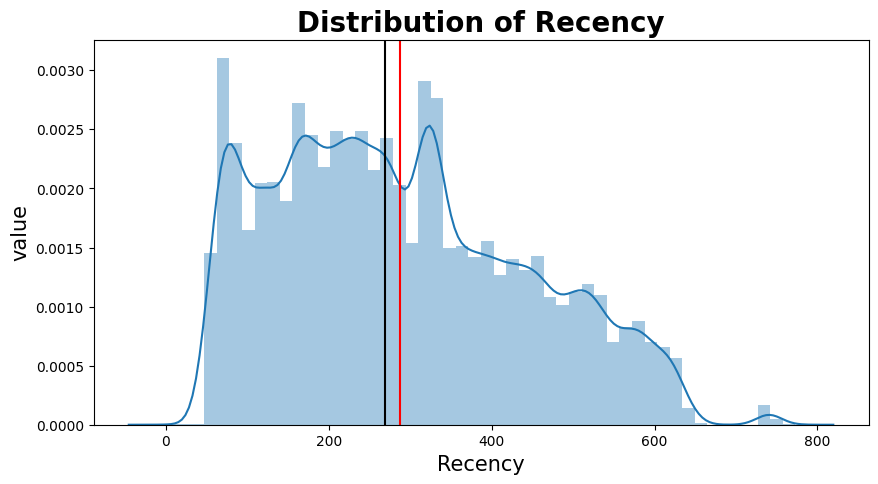

Mean of recency:  288.1347309763326
Median of recency:  269.0
Skewness of recency:  0.44561889147979705


In [19]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Recency)
plt.axvline(rfm.Recency.mean(), c = 'red')
plt.axvline(rfm.Recency.median(), c = 'black')
plt.title('Distribution of Recency',fontweight='bold',fontsize=20)
plt.xlabel('Recency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of recency: ', rfm.Recency.mean())
print('Median of recency: ', rfm.Recency.median())
print('Skewness of recency: ', rfm.Recency.skew())

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_10847/3214567786.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




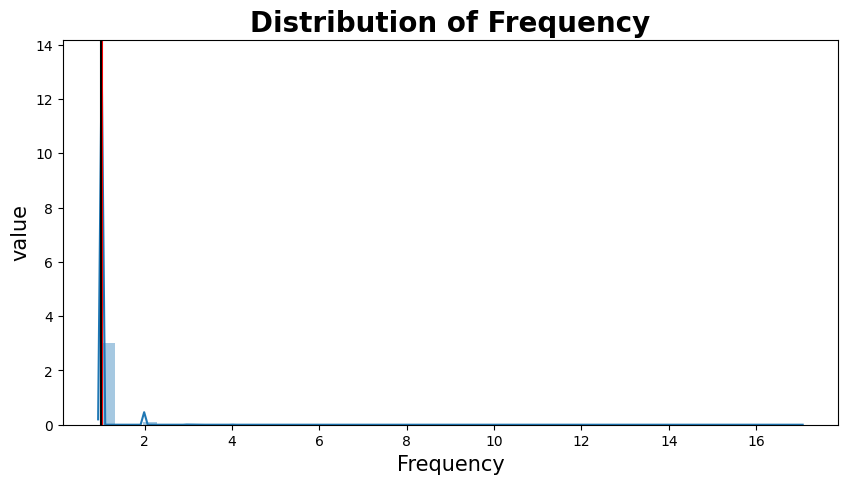

Mean of frequency:  1.0348019368034396
Median of frequency:  1.0
Skewness of frequency:  11.877436346029382


In [20]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Frequency)
plt.axvline(rfm.Frequency.mean(), c = 'red')
plt.axvline(rfm.Frequency.median(), c = 'black')
plt.title('Distribution of Frequency',fontweight='bold',fontsize=20)
plt.xlabel('Frequency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of frequency: ', rfm.Frequency.mean())
print('Median of frequency: ', rfm.Frequency.median())
print('Skewness of frequency: ', rfm.Frequency.skew())

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_10847/4197457027.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/putuwistika/.pyenv/versions/3.10.16/envs/digits/lib/python3.10/site-packages/seaborn/distributions.py:2496: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



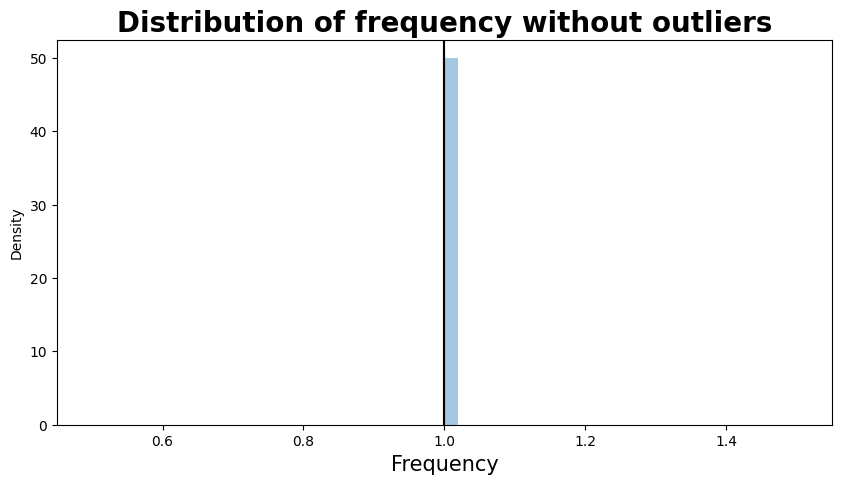

In [21]:
Q1 = np.quantile(rfm.Frequency, 0.25)
Q3 = np.quantile(rfm.Frequency, 0.75)
IQR = Q3 - Q1
frequencyDistribution = rfm[~((rfm.Frequency < Q1 - 1.5 * IQR) | (rfm.Frequency > Q3 + 1.5 * IQR))]
frequencyDistribution.head()

plt.figure(figsize=(10, 5))
sns.distplot(frequencyDistribution.Frequency)
plt.axvline(frequencyDistribution.Frequency.mean(), c = 'red')
plt.axvline(frequencyDistribution.Frequency.median(), c = 'black')
plt.xlabel('Frequency',color='black',fontsize=15)
plt.title('Distribution of frequency without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [22]:
frequencyDistribution.Frequency.describe()

count   92840.000000
mean        1.000000
std         0.000000
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Frequency, dtype: float64

The frequency from RFM analysis without outliers has a standard deviation of 0, that is, all the values are only 1.
So the frequency will not help in our analysis and also to segment the customers.

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_10847/15804976.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




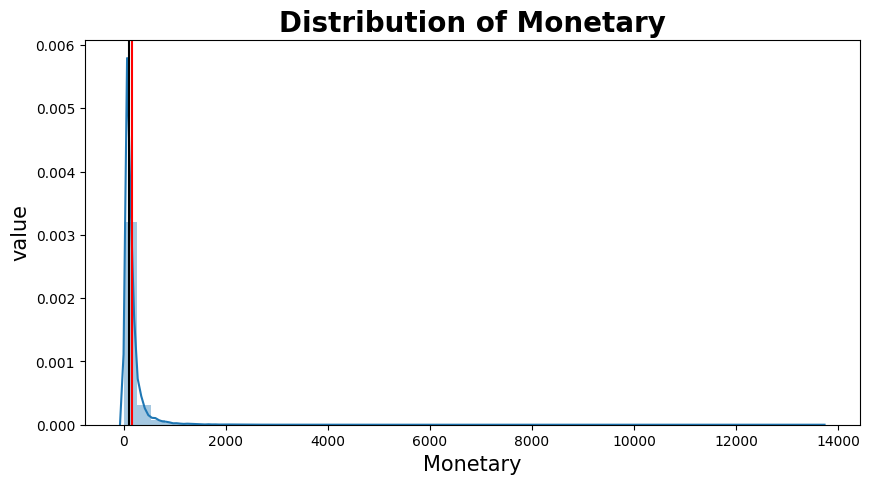

Mean of monetary:  163.80123606878993
Median of monetary:  106.29
Skewness of monetary:  9.61017961885641


In [23]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Monetary)
plt.axvline(rfm.Monetary.mean(), c = 'red')
plt.axvline(rfm.Monetary.median(), c = 'black')
plt.title('Distribution of Monetary',fontweight='bold',fontsize=20)
plt.xlabel('Monetary',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of monetary: ', rfm.Monetary.mean())
print('Median of monetary: ', rfm.Monetary.median())
print('Skewness of monetary: ', rfm.Monetary.skew())

In [24]:
Q1 = np.quantile(rfm.Monetary, 0.25)
Q3 = np.quantile(rfm.Monetary, 0.75)
IQR = Q3 - Q1
monetaryDistribution = rfm[~((rfm.Monetary < Q1 - 1.5 * IQR) | (rfm.Monetary > Q3 + 1.5 * IQR))]
monetaryDistribution.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.900000
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.190000
2,0000f46a3911fa3c0805444483337064,586,1,86.220000
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.620000
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.890000


/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_10847/1803402267.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




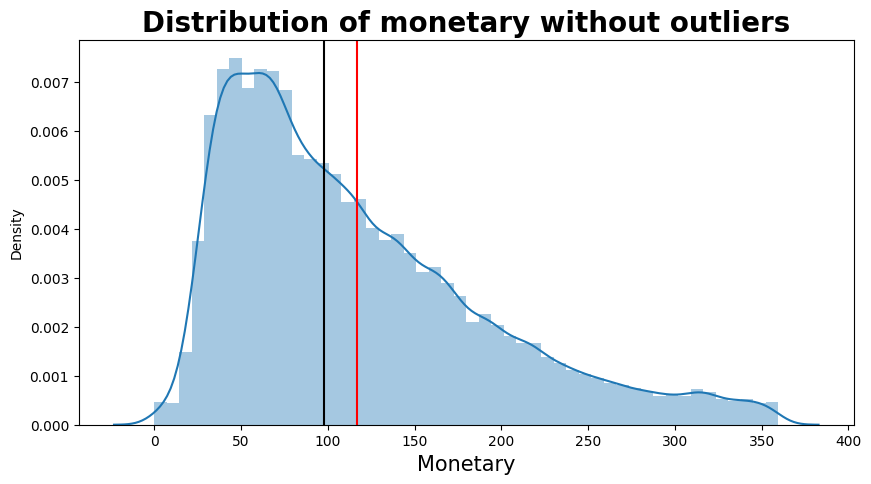

In [25]:
plt.figure(figsize=(10, 5))
sns.distplot(monetaryDistribution.Monetary)
plt.axvline(monetaryDistribution.Monetary.mean(), c = 'red')
plt.axvline(monetaryDistribution.Monetary.median(), c = 'black')
plt.xlabel('Monetary',color='black',fontsize=15)
plt.title('Distribution of monetary without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [26]:
monetaryDistribution.Monetary.describe()

count   88207.000000
mean      116.661183
std        75.393663
min         0.000000
25%        58.090000
50%        97.920000
75%       158.265000
max       359.640000
Name: Monetary, dtype: float64

The average monetary value after outlier treatement is 123.45, while the median value is 99.90.
The middle 50% of values of monetary lie between 59.38 and 165.3.

## Customer Segmentation

In [27]:
# Labels for Recency

ll_r = rfm.Recency.quantile(0.25)
mid_r = rfm.Recency.quantile(0.50)
ul_r = rfm.Recency.quantile(0.75)
print(ll_r, mid_r, ul_r)

164.0 269.0 397.0


In [28]:
def recency_label(recent):
    if recent <= ll_r:
        return 1
    elif (recent > ll_r) and (recent <= mid_r):
        return 2
    elif (recent > mid_r) and (recent <= ul_r):
        return 3
    elif recent > ul_r:
        return 4

In [29]:
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,recency_label
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.900000,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.190000,1
2,0000f46a3911fa3c0805444483337064,586,1,86.220000,4
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.620000,3
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.890000,3


Recency label breakdown:
- 1 - These are the customers who whose visit date(s) are the most recent. (Recency value within the 25% quantile)
- 2 - These are the customers who whose visit date(s) are not very recent. (Recency value between 25% and 50% quantile)
- 3 - These are the customers who whose visit date(s) are somewhat recent. (Recency value between 50% and 75% quantile)
- 4 - These are the customers who whose visit date(s) are the oldest. (Recency value more than 75% quantile)

In [30]:
# Labels for Monetary

ll_m = rfm.Monetary.quantile(0.25)
mid_m = rfm.Monetary.quantile(0.50)
ul_m = rfm.Monetary.quantile(0.75)
print(ll_m, mid_m, ul_m)

61.5675 106.29 180.8


In [31]:
def monetary_label(money):
    if money <= ll_m:
        return 4
    elif (money > ll_m) and (money <= mid_m):
        return 3
    elif (money > mid_m) and (money <= ul_m):
        return 2
    elif money > ul_m:
        return 1

In [32]:
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,recency_label,monetary_label
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.900000,1,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.190000,1,4
2,0000f46a3911fa3c0805444483337064,586,1,86.220000,4,3
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.620000,3,4
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.890000,3,1


Monetary label breakdown:
- 1 - These are the customers who spend large amount. (Monetary value within the 25% quantile)
- 2 - These are the customers who spend good amount. (Monetary value between 25% and 50% quantile)
- 3 - These are the customers who spend moderately. (Monetary value between 50% and 75% quantile)
- 4 - These are the customers who spend the least. (Monetary value more than 75% quantile)

In [33]:
#Labels for Frequency

rfm.Frequency.value_counts()

Frequency
1     92840
2      2737
3       202
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64

In [34]:
def frequency_label(frequent):
    if frequent == 1:
        return 4
    elif frequent == 2:
        return 3
    elif frequent == 3:
        return 2
    elif frequent > 3:
        return 1

In [35]:
rfm['frequency_label'] = rfm.Frequency.apply(frequency_label)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,recency_label,monetary_label,frequency_label
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.900000,1,2,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.190000,1,4,4
2,0000f46a3911fa3c0805444483337064,586,1,86.220000,4,3,4
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.620000,3,4,4
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.890000,3,1,4


Frequency label breakdown:
- 1 - These are the most frequent customers. (Frequency > 3)
- 2 - These are the frequent frequent customers. (Frequency = 3)
- 3 - These are the somewhat frequent customers. (Frequency = 2)
- 4 - These are the least frequent customers. (Frequency = 1)

In [36]:
rfm['Rank'] = list(zip(rfm.recency_label, rfm.monetary_label, rfm.frequency_label))
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,recency_label,monetary_label,frequency_label,Rank
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.900000,1,2,4,"(1, 2, 4)"
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.190000,1,4,4,"(1, 4, 4)"
2,0000f46a3911fa3c0805444483337064,586,1,86.220000,4,3,4,"(4, 3, 4)"
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.620000,3,4,4,"(3, 4, 4)"
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.890000,3,1,4,"(3, 1, 4)"


In [37]:
rfm.recency_label.value_counts()

recency_label
1    24118
4    23945
2    23920
3    23845
Name: count, dtype: int64

In [38]:
rfm.frequency_label.value_counts()

frequency_label
4    92840
3     2737
2      202
1       49
Name: count, dtype: int64

In [39]:
rfm.monetary_label.value_counts()

monetary_label
3    23971
4    23957
1    23955
2    23945
Name: count, dtype: int64

In [40]:
rfm['rank_rm'] = list(zip(rfm.recency_label, rfm.monetary_label))
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,recency_label,monetary_label,frequency_label,Rank,rank_rm
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.900000,1,2,4,"(1, 2, 4)","(1, 2)"
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.190000,1,4,4,"(1, 4, 4)","(1, 4)"
2,0000f46a3911fa3c0805444483337064,586,1,86.220000,4,3,4,"(4, 3, 4)","(4, 3)"
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.620000,3,4,4,"(3, 4, 4)","(3, 4)"
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.890000,3,1,4,"(3, 1, 4)","(3, 1)"


In [41]:
rfm.rank_rm.value_counts()

rank_rm
(4, 4)    6227
(4, 3)    6209
(1, 2)    6203
(1, 1)    6160
(3, 3)    6122
(2, 2)    6102
(2, 1)    6033
(2, 4)    5992
(3, 2)    5965
(3, 1)    5928
(1, 4)    5908
(1, 3)    5847
(4, 1)    5834
(3, 4)    5830
(2, 3)    5793
(4, 2)    5675
Name: count, dtype: int64

Meaning of ranks:
The most important and least important customers (Recency Rank, Monetary Rank):

Comparing Recency and Monetary - Recency rank is of higher importance than Monetary rank
The most important ranks:

- (Recency - 1, Monetary - 1) - They are very recent and have spend a lot of money
- (Recency - 1, Monetary - 2) - They are very recent and have spend a good amount of money
- (Recency - 2, Monetary - 1) - They are recent and have spend a lot of money
- (Recency - 2, Monetary - 2) - They are recent and have spend a good of money
- (Recency - 1, Monetary - 3) - They are very recent and have spend a decent of money

The least important ranks:

- (Recency - 4, Monetary - 4) - They are not at all recent and spend a negligible amount of money
- (Recency - 4, Monetary - 3) - They are not at all recent and spend a a decent amount of money
- (Recency - 4, Monetary - 2) - They are not at all recent and spend a good amount of money
- (Recency - 3, Monetary - 4) - They are not very recent and spend a negligible amount of money
- (Recency - 3, Monetary - 3) - They are not very recent and spend a decent amount of money

Since most of the frequency class is 4, we will use only recency and monetary for customer segmentation.

Insights from Recency Ranks:

1. Customers can be incentivised to purchase more in our store using offers/discounts/events which will make them more recent and at the same time bring in more money
2. Customers will use our store if the website is user-friendly and quick. This will help make the customer's shopping experience smooth meaning they will continue coming back to our store/website for their purchasing needs
3. When advertising using digital marketing techniques:
- Customers who have a low recency ranks should be targeted less or removed from advertisement lists as it will not bring as much or even returns/sales (This can also be done using customer's time spent on website but that will be for a future project)
- Customers who have high recency ranks should be targeted more extensively as it will bring a lot of sales in return

Insights from Monetary Ranks:

1. Customer's monetary values can be increased with a better algorithm which will recommend similar/useful items when an item is added to cart

Insights from Frequency Ranks:
97% (89100 out of 91832) of the customers have the lowest frequency rank (4) meaning they are very infrequent in their purchases. In order to combat this:-

- Local language can be used in the ecommerce platform/store
- Extend special offers for repeated purchases
- Encourage Loyalty programs
- Lower the Product Pricing for Increased Customer Frequency

## Creating a target variable

In [42]:
# rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)
# rfm.head()


rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > 90 else 0)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,recency_label,monetary_label,frequency_label,Rank,rank_rm,Churn
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.900000,1,2,4,"(1, 2, 4)","(1, 2)",1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.190000,1,4,4,"(1, 4, 4)","(1, 4)",1
2,0000f46a3911fa3c0805444483337064,586,1,86.220000,4,3,4,"(4, 3, 4)","(4, 3)",1
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.620000,3,4,4,"(3, 4, 4)","(3, 4)",1
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.890000,3,1,4,"(3, 1, 4)","(3, 1)",1


In [43]:
rfm['Churn'].value_counts().sort_index()


Churn
0     9542
1    86286
Name: count, dtype: int64

In [44]:
final = raw_data.merge(rfm[['customer_unique_id', 'Recency', 'Monetary', 'Frequency', 'Churn']], on = 'customer_unique_id')
final.head()

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_city,seller_state,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered,Recency,Monetary,Frequency,Churn
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.000000,87285b34884572647811a353c7ac498a,Housewares,40.000000,268.000000,4.000000,500.000000,19.000000,8.000000,13.000000,3504c0cb71d7fa48d967e0e4c94d59d9,Chhuikhadan,Chhattisgarh,a54f0611adc9ed256b57ede6b6eb5114,4.000000,2017-10-11,2017-10-12 03:43:00,2.000000,voucher,1.000000,18.590000,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh,660.000000,2.000000,6.000000,7.000000,8.000000,380,62.700000,2,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,1.000000,595fac2a385ac33a80bd5114aec74eb8,Perfumery,29.000000,178.000000,1.000000,400.000000,19.000000,13.000000,19.000000,289cdb325fb7e7f891c38608bf9e0962,Anantapur,Andhra Pradesh,8d5266042046a06655c8db133d120ba5,4.000000,2018-08-08,2018-08-08 18:37:00,1.000000,UPI,1.000000,141.460000,-12.169860,-44.988369,Pandariya,Chhattisgarh,24180.000000,0.000000,12.000000,5.000000,13.000000,85,141.460000,1,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,1.000000,aa4383b373c6aca5d8797843e5594415,Auto,46.000000,232.000000,1.000000,420.000000,24.000000,19.000000,21.000000,4869f7a5dfa277a7dca6462dcf3b52b2,Freelandgunj,Gujarat,e73b67b67587f7644d5bd1a52deb1b01,5.000000,2018-08-18,2018-08-22 19:07:00,1.000000,credit_card,3.000000,179.120000,-16.746337,-48.514624,Dhamdha,Chhattisgarh,1020.000000,0.000000,9.000000,17.000000,9.000000,70,179.120000,1,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,1.000000,d0b61bfb1de832b15ba9d266ca96e5b0,Pet_Shop,59.000000,468.000000,3.000000,450.000000,30.000000,10.000000,20.000000,66922902710d126a0e7d26b0e3805106,Anantapur,Andhra Pradesh,359d03e676b3c069f62cadba8dd3f6e8,5.000000,2017-12-03,2017-12-05 19:21:00,1.000000,credit_card,1.000000,72.200000,-5.767733,-35.275467,Kartarpur,Punjab,1020.000000,3.000000,9.000000,12.000000,13.000000,333,72.200000,1,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,1.000000,65266b2da20d04dbe00c5c2d3bb7859e,Stationery,38.000000,316.000000,4.000000,250.000000,51.000000,15.000000,15.000000,2c9e548be18521d1c43cde1c582c6de8,Akkayapalle,Andhra Pradesh,e50934924e227544ba8246aeb3770dd4,5.000000,2018-02-17,2018-02-18 13:02:00,1.000000,credit_card,1.000000,28.620000,-23.675037,-46.524784,Bheemavaram,Andhra Pradesh,3720.000000,0.000000,1.000000,9.000000,2.000000,246,28.620000,1,1


In [45]:
records, features = final.shape
print('Total number of unique records: ', records)
print('Total number of features: ', features)

Total number of unique records:  99163
Total number of features:  46


In [46]:
final['Churn'] = final.Churn.astype('object')

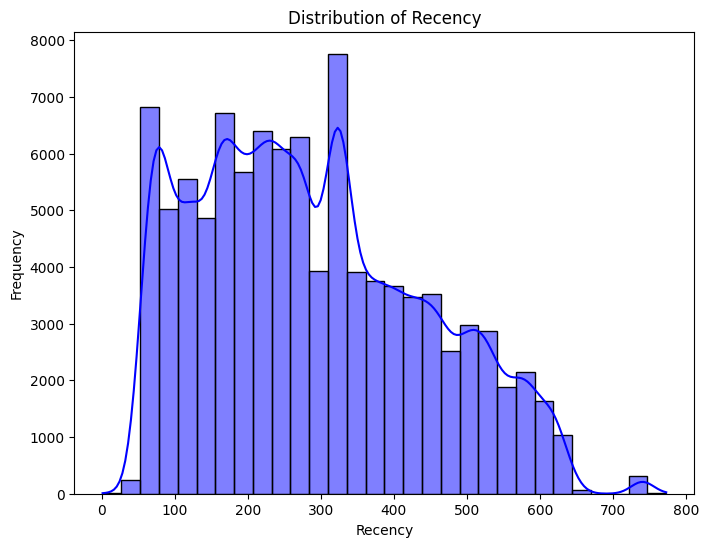

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final['Recency'] is a pandas Series containing the data
plt.figure(figsize=(8, 6))

# Plotting the distribution using seaborn
sns.histplot(final['Recency'], kde=True, color='blue', bins=30)

# Adding labels and title
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


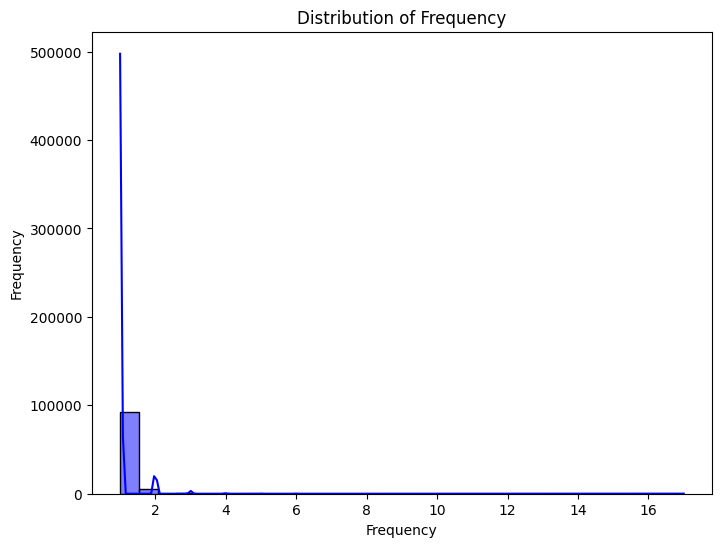

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final['Recency'] is a pandas Series containing the data
plt.figure(figsize=(8, 6))

# Plotting the distribution using seaborn
sns.histplot(final['Frequency'], kde=True, color='blue', bins=30)

# Adding labels and title
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


In [129]:
final['Recency'].describe()

count   99163.000000
mean      287.348648
std       153.266870
min         1.000000
25%       163.000000
50%       268.000000
75%       396.000000
max       773.000000
Name: Recency, dtype: float64

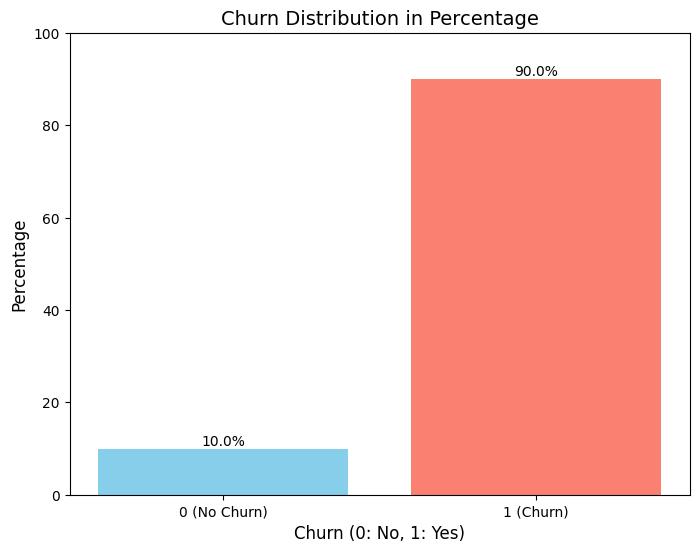

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh dataframe
# rfm = pd.DataFrame({'Churn': [1, 0, 1, 0, 0, 1, 0, 1, 1]})

# Hitung jumlah dan persentase
churn_counts = rfm['Churn'].value_counts().sort_index()  # Urutkan index agar 0 dan 1
churn_percentage = churn_counts / churn_counts.sum() * 100

# Plot data
plt.figure(figsize=(8, 6))
bars = plt.bar(churn_percentage.index, churn_percentage, color=['skyblue', 'salmon'])

# Tambahkan persentase di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Label dan judul
plt.title('Churn Distribution in Percentage', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.xticks([0, 1], ['0 (No Churn)', '1 (Churn)'])
plt.ylim(0, 100)
plt.show()


# 2. Data Cleansing

## 1.1 Handle missing values

In [131]:
df = final.copy()

In [132]:
# Check missing values
print("\n1. Missing Values Check:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_summary[missing_summary['Missing Values'] > 0])


1. Missing Values Check:
                               Missing Values  Percentage
order_approved_at                         159    0.160342
order_delivered_carrier_date             1776    1.790991
order_delivered_customer_date            2951    2.975908
order_item_id                             986    0.994322
product_id                                986    0.994322
product_category_name                    2420    2.440426
product_name_length                      2398    2.418241
product_description_length               2398    2.418241
product_photos_qty                       2398    2.418241
product_weight_g                         1002    1.010458
product_length_cm                        1002    1.010458
product_height_cm                        1002    1.010458
product_width_cm                         1002    1.010458
seller_id                                 986    0.994322
seller_city                              2359    2.378911
seller_state                             2359 

In [133]:
# Menghapus baris yang memiliki missing values
df = df.dropna(axis=0, how='any')

In [134]:
# Check missing values
print("\n1. Missing Values Check:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_summary[missing_summary['Missing Values'] > 0])


1. Missing Values Check:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


## 1.2 Handle duplicated data

In [135]:
# Mengecek apakah ada duplikat di setiap baris
duplicates = df.duplicated()

# Menampilkan jumlah duplikat dan baris yang duplikat
print(f"Jumlah baris duplikat: {duplicates.sum()}")
print("Baris yang duplikat:")
print(df[duplicates])

Jumlah baris duplikat: 0
Baris yang duplikat:
Empty DataFrame
Columns: [order_id, customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, order_item_id, product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, seller_id, seller_city, seller_state, review_id, review_score, review_creation_date, review_answer_timestamp, payment_sequential, payment_type, payment_installments, payment_value, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state, purchased_approved, approved_carrier, carrier_delivered, delivered_estimated, purchased_delivered, Recency, Monetary, Frequency, Churn]
Index: []


# 4. Split Data

Data Split (untuk menghindari data leakage): Setelah data dibersihkan, Anda sebaiknya membagi data menjadi set pelatihan (train), validasi (val), dan pengujian (test). Lakukan pembagian data sebelum melakukan feature transformation atau encoding untuk menghindari data leakage, yaitu ketika informasi dari data test "terpapar" ke model selama pelatihan. Ini bisa menyebabkan overfitting.

## 3.1 Data Split

In [136]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df.drop(columns=['Churn'])  # Fitur (tanpa target)
y = df['Churn']  # Target

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek hasil split
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 74208
Jumlah data uji: 18552


# 4. Feature Transformation

In [137]:
X_train

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_city,seller_state,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered,Recency,Monetary,Frequency
2819,522649ba1f9bbb27383b7e8dcd92e746,75c1add0b9b5d6bb9948873a85f19981,8aae1fe1241741cbc1deec6e29998065,9551,Vinukonda,Andhra Pradesh,delivered,2018-01-21 22:42:00,2018-01-23 03:36:00,2018-01-23 22:48:00,2018-01-26 14:41:00,2018-02-14,1.000000,87b193bb0fb52703cade96b1ffd8c233,Sports_Leisure,36.000000,410.000000,1.000000,1086.000000,24.000000,24.000000,22.000000,3fd1e727ba94cfe122d165e176ce7967,Singapur,Andhra Pradesh,b23da8ea1629d58212c87c4e7c907a26,5.000000,2018-01-27,2018-01-28 16:19:00,1.000000,UPI,1.000000,117.970000,-23.619889,-46.554965,Vinukonda,Andhra Pradesh,17640.000000,0.000000,2.000000,18.000000,4.000000,269,117.970000,1
50977,6c4a7301e854d61f245807b71ec7642b,614cb17913a2d2e976db5dc6728b3438,cfb21d22f8a26e71d30ef7215c05c83a,60125,Dowleswaram,Andhra Pradesh,delivered,2017-10-27 08:19:00,2017-10-28 03:07:00,2017-10-30 19:14:00,2017-11-03 22:38:00,2017-12-04,1.000000,87283a98b24f9f1ac3a31b631073cf47,Fashion_Bags_Accessories,50.000000,411.000000,5.000000,150.000000,16.000000,5.000000,20.000000,cab85505710c7cb9b720bceb52b01cee,Akkarampalle,Andhra Pradesh,31e63585b7a739ec6485a446e7df9222,5.000000,2017-11-04,2017-11-06 10:33:00,1.000000,UPI,1.000000,67.530000,-3.726052,-38.500435,Dowleswaram,Andhra Pradesh,67680.000000,2.000000,4.000000,30.000000,7.000000,355,67.530000,1
50428,5981fe47e1bfe9374b5c58d57ef9dbab,610afaffeb1682f6c97c3dcfde10f361,96cf2365af288c0bb05034020a2accff,96990,Kiraoli,Uttar Pradesh,delivered,2017-11-24 15:43:00,2017-11-26 16:51:00,2017-11-29 02:09:00,2017-12-13 00:09:00,2017-12-27,1.000000,e0884eed28311e4365d93a89ac57eafb,Audio,47.000000,423.000000,1.000000,250.000000,27.000000,5.000000,20.000000,7040e82f899a04d1b434b795a43b4617,Akkarampalle,Andhra Pradesh,b4aa1d922e7217e553642b651f573282,5.000000,2017-12-13,2017-12-16 00:17:00,1.000000,credit_card,3.000000,30.000000,-29.176431,-53.159138,Kiraoli,Uttar Pradesh,4080.000000,2.000000,13.000000,13.000000,18.000000,327,30.000000,1
63671,0cddb9a478d70a5651d1d36838974686,49fc491cda67a572a6fa17631b3ff033,b15f238f84a6dc0efd1fa9ea22abed5c,22753,Badepalle,Andhra Pradesh,delivered,2017-11-27 13:48:00,2017-11-27 13:57:00,2017-11-27 20:48:00,2017-12-06 21:54:00,2017-12-15,1.000000,bd5556852920e0d5ebb6044894391ca6,Sports_Leisure,53.000000,3219.000000,10.000000,250.000000,28.000000,13.000000,14.000000,9b013e03b2ab786505a1d3b5c0756754,Devanhalli,Karnataka,49dbbd2a465d38564a957e3fcfe115ed,5.000000,2017-12-07,2017-12-10 03:02:00,1.000000,credit_card,5.000000,52.590000,-22.979381,-43.332765,Badepalle,Andhra Pradesh,540.000000,0.000000,9.000000,8.000000,9.000000,324,52.590000,1
52110,dc3fedc15bcfea3fb0e670ce3a8f3c27,38d75878e2052f90ba0691ca550bbe3e,d7d189a700053506ed878082f3063260,26183,Ramagundam,Andhra Pradesh,delivered,2018-08-04 23:30:00,2018-08-05 23:25:00,2018-08-06 12:24:00,2018-08-13 21:18:00,2018-08-27,1.000000,e919bdbe0314f5cef7d86707f9d89c1e,Housewares,39.000000,412.000000,1.000000,675.000000,18.000000,21.000000,16.000000,df47da4ae86fa4db890d05aaf24e21d8,Akkarampalle,Andhra Pradesh,acadc08edd938f98bb8fc461a68e3b3a,5.000000,2018-08-14,2018-08-15 14:32:00,1.000000,credit_card,3.000000,75.500000,-22.723784,-43.339365,Ramagundam,Andhra Pradesh,86100.000000,0.000000,7.000000,13.000000,8.000000,74,75.5

## 4.1 Handle outliers

In [138]:
# Deteksi dan penanganan outlier pada X_train
print("\n3. Outliers Check (using Z-score method):")
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
outliers_summary = {}


3. Outliers Check (using Z-score method):


In [139]:
# Deteksi outlier dengan Z-score
for column in numeric_columns:
    z_scores = np.abs(stats.zscore(X_train[column].dropna()))
    outliers = len(z_scores[z_scores > 3])
    if outliers > 0:
        outliers_summary[column] = outliers

In [140]:
# Ringkasan outlier
if outliers_summary:
    print("Number of outliers (|Z-score| > 3) per column:")
    for col, count in outliers_summary.items():
        print(f"{col}: {count} outliers")
else:
    print("No significant outliers found in numeric columns")

Number of outliers (|Z-score| > 3) per column:
order_item_id: 1718 outliers
product_name_length: 388 outliers
product_description_length: 1818 outliers
product_photos_qty: 1128 outliers
product_weight_g: 1769 outliers
product_length_cm: 1491 outliers
product_height_cm: 1614 outliers
product_width_cm: 1140 outliers
payment_sequential: 1315 outliers
payment_installments: 229 outliers
payment_value: 1297 outliers
geolocation_lat: 1959 outliers
geolocation_lng: 467 outliers
purchased_approved: 1406 outliers
approved_carrier: 1519 outliers
carrier_delivered: 1159 outliers
delivered_estimated: 1025 outliers
purchased_delivered: 1227 outliers
Recency: 71 outliers
Monetary: 1272 outliers
Frequency: 560 outliers


Skewness of customer_zip_code_prefix: 0.7817537226809779
Standard deviation of customer_zip_code_prefix: 29841.2533751051


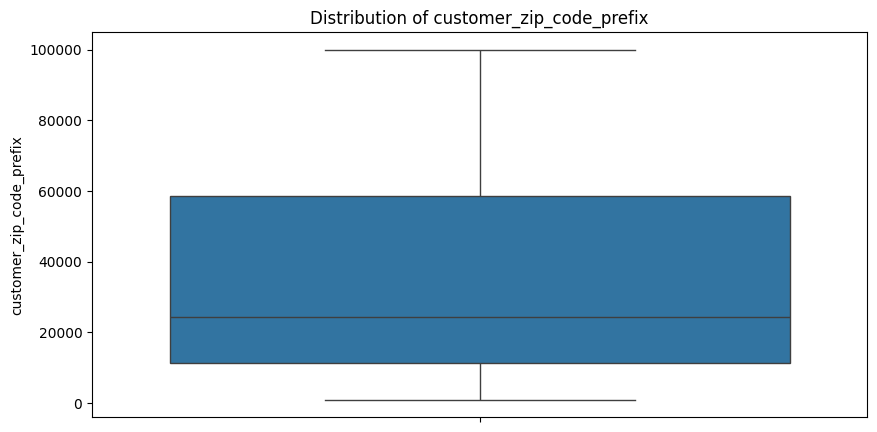

Skewness of order_item_id: 7.791409047399574
Standard deviation of order_item_id: 0.5394567073831066


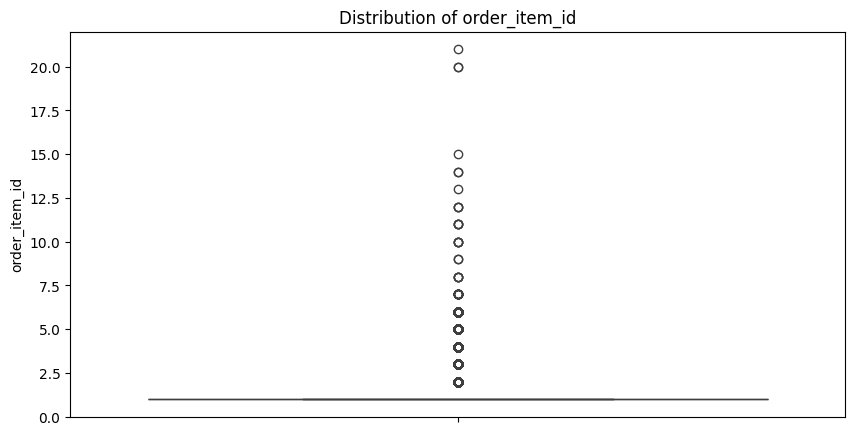

Skewness of product_name_length: -0.9222207152525013
Standard deviation of product_name_length: 9.987748994661185


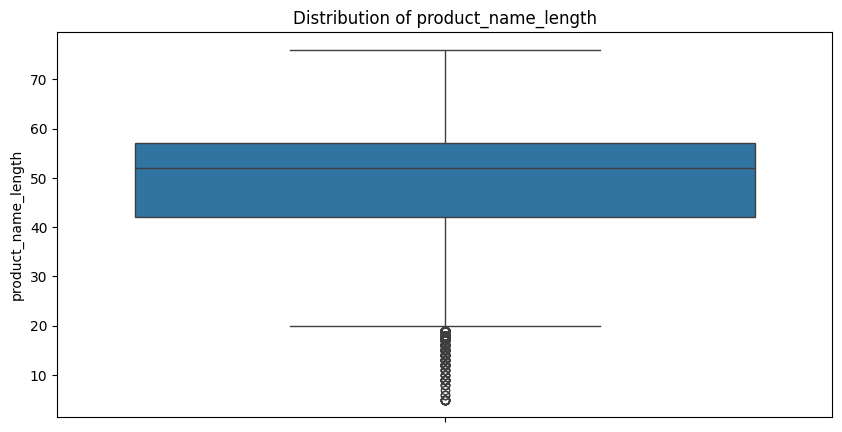

Skewness of product_description_length: 2.0006792495615846
Standard deviation of product_description_length: 652.1207835718295


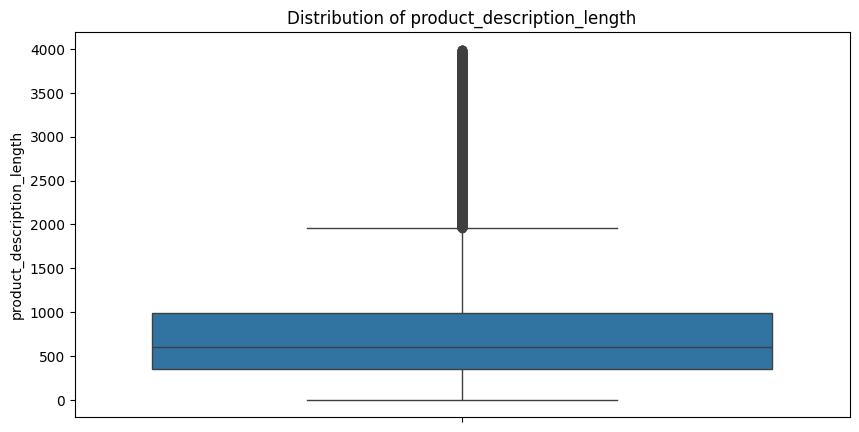

Skewness of product_photos_qty: 1.84609151342882
Standard deviation of product_photos_qty: 1.7449349021388183


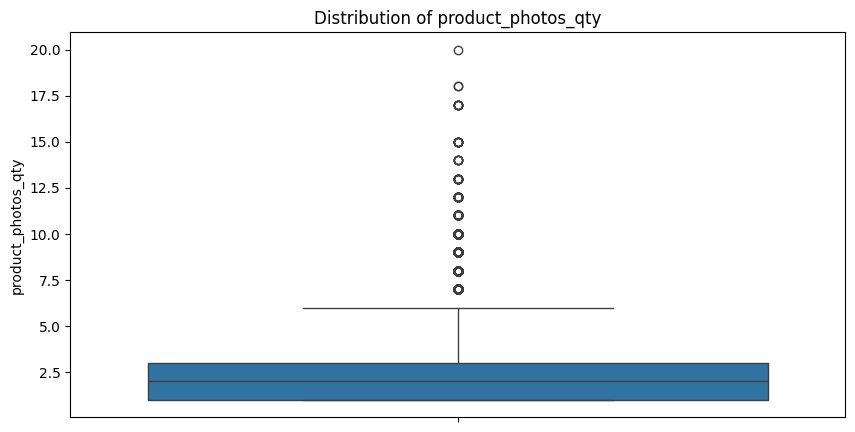

Skewness of product_weight_g: 3.7112070832427055
Standard deviation of product_weight_g: 3651.860715163979


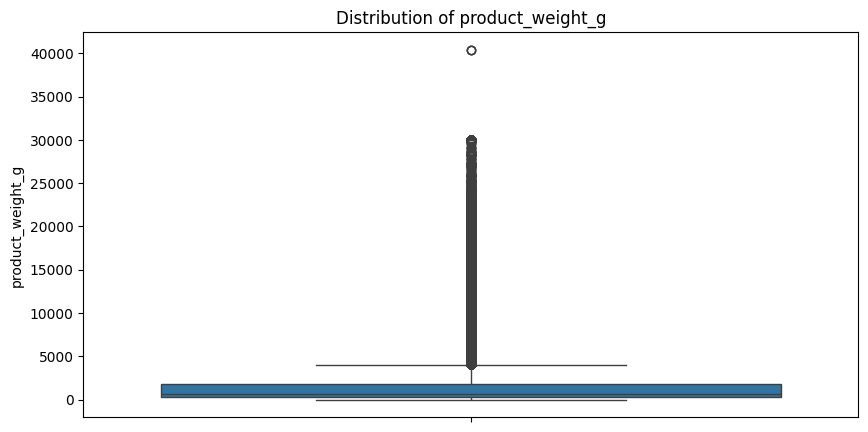

Skewness of product_length_cm: 1.7875661555500162
Standard deviation of product_length_cm: 16.119040952618874


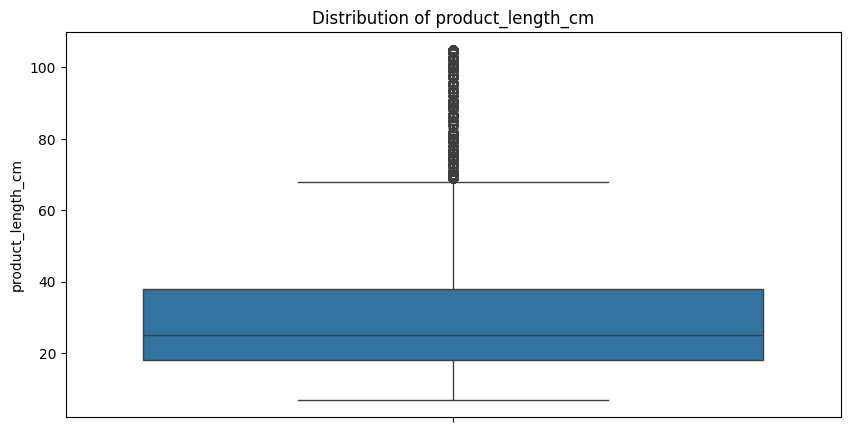

Skewness of product_height_cm: 2.2663333065880535
Standard deviation of product_height_cm: 13.102425661440531


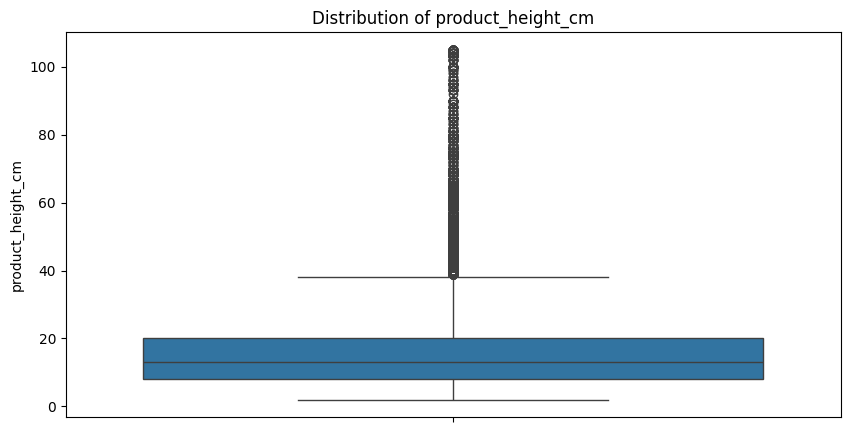

Skewness of product_width_cm: 1.7149736095168098
Standard deviation of product_width_cm: 11.59494021364515


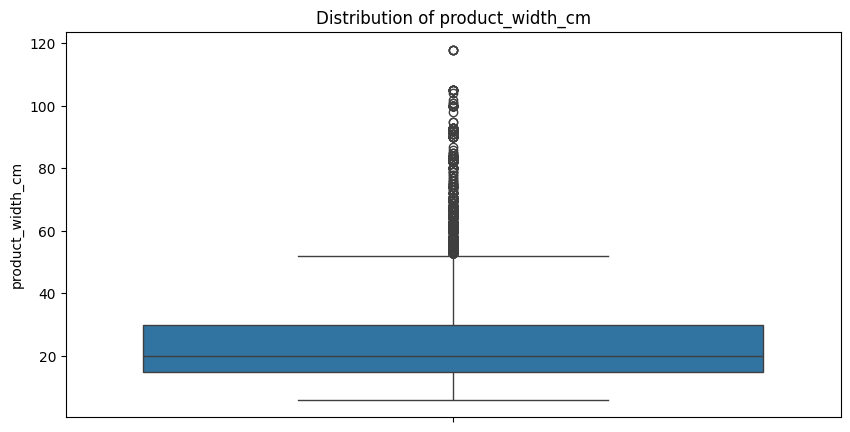

Skewness of review_score: -1.4650112392405115
Standard deviation of review_score: 1.2923250810693165


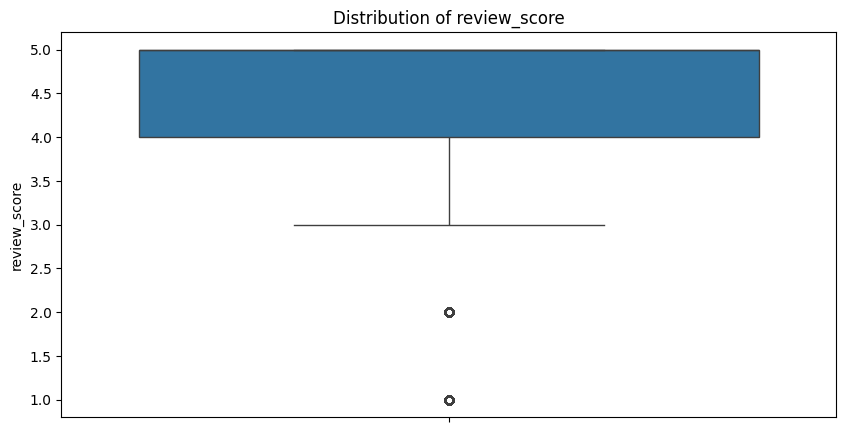

Skewness of payment_sequential: 26.177855078963955
Standard deviation of payment_sequential: 0.23778476724628209


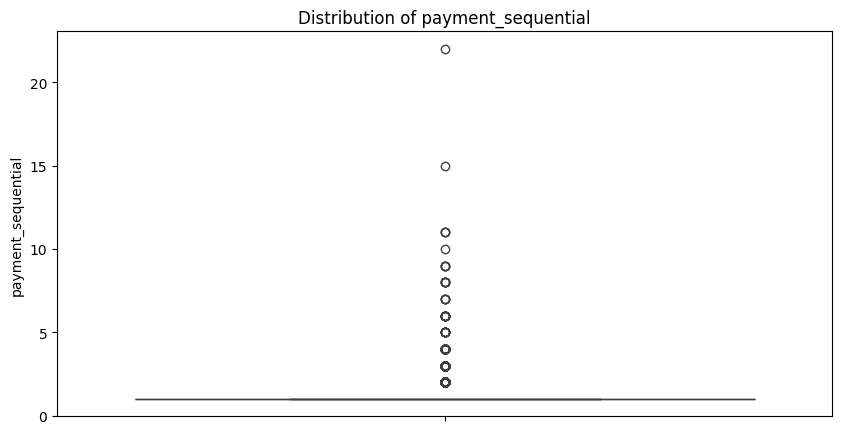

Skewness of payment_installments: 1.621616015855011
Standard deviation of payment_installments: 2.7010875033898487


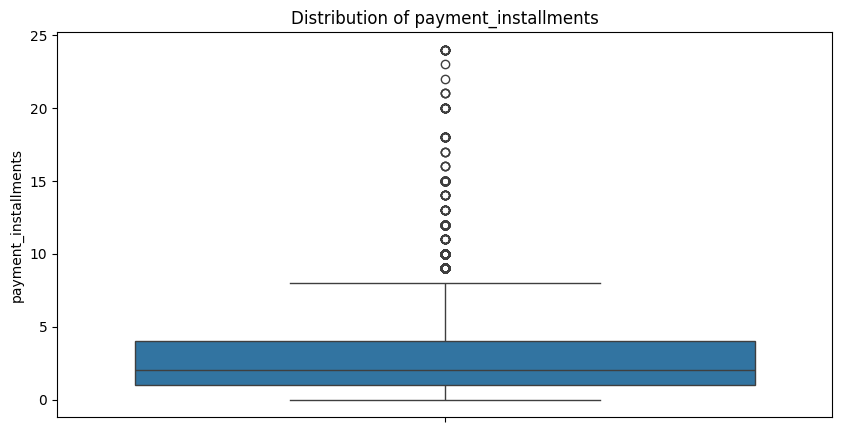

Skewness of payment_value: 7.570057571035502
Standard deviation of payment_value: 211.98391520909303


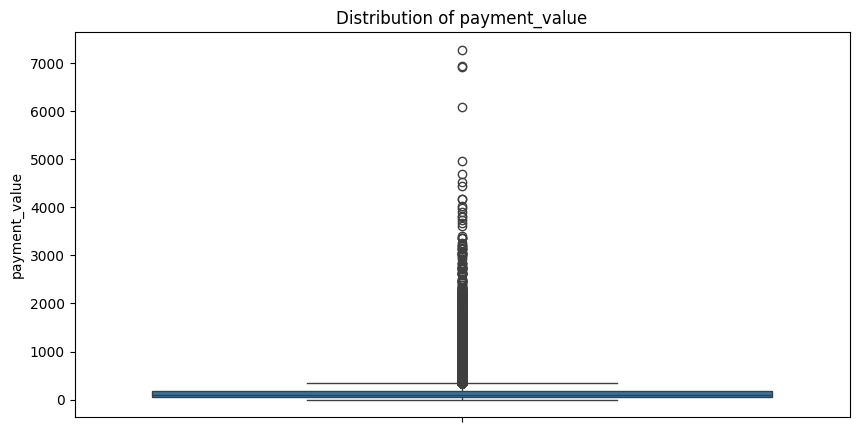

Skewness of geolocation_lat: 1.6579246255393183
Standard deviation of geolocation_lat: 5.597161731687806


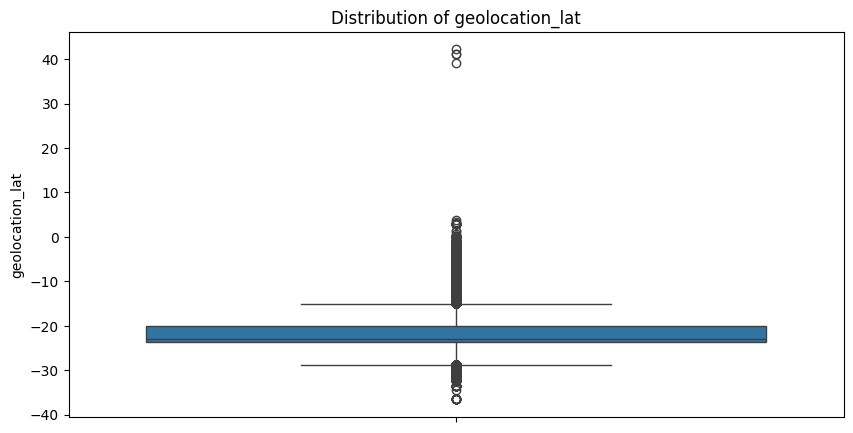

Skewness of geolocation_lng: 0.03058268069588386
Standard deviation of geolocation_lng: 4.069828820968925


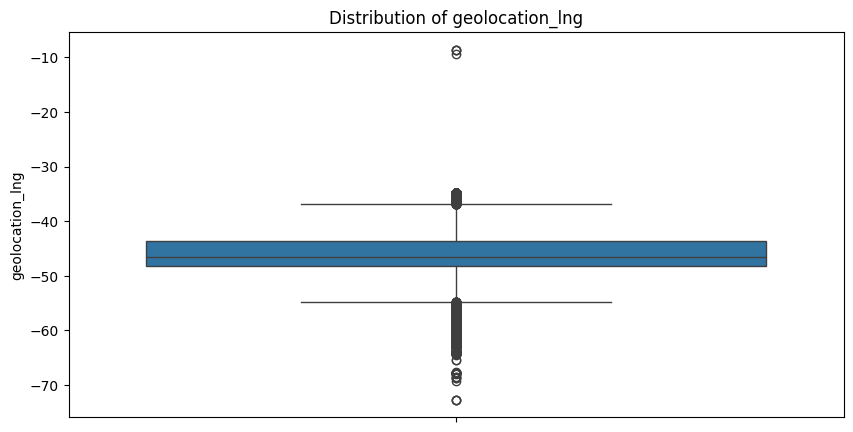

Skewness of purchased_approved: 1.687328921643181
Standard deviation of purchased_approved: 23530.693553900648


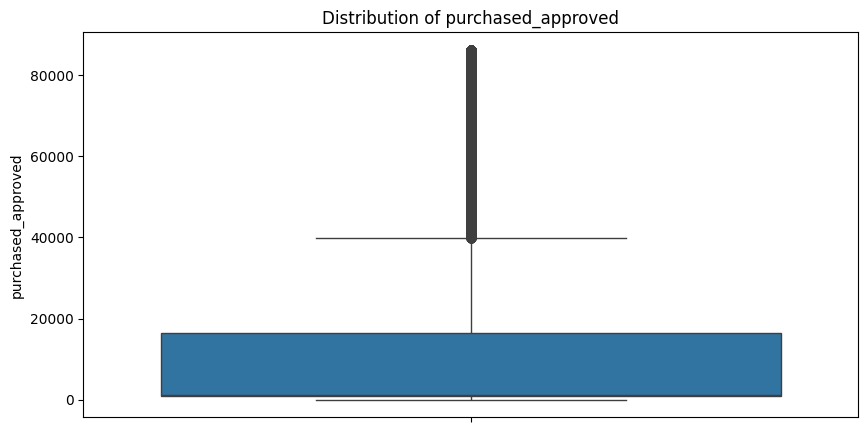

Skewness of approved_carrier: 4.738524616457279
Standard deviation of approved_carrier: 3.4653965447077


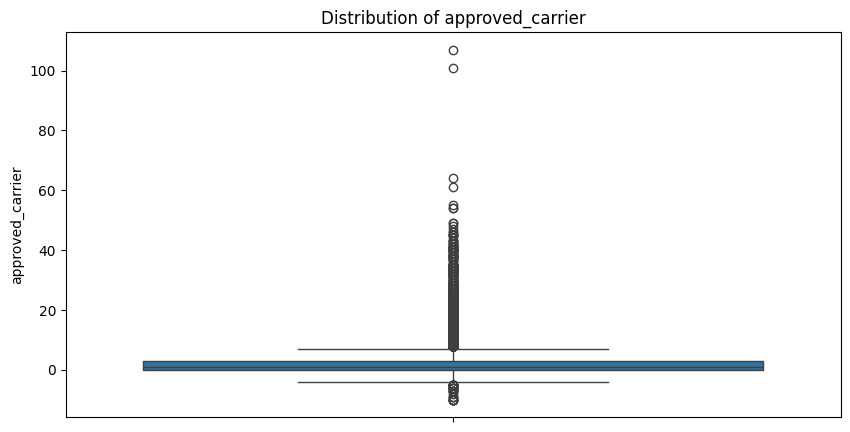

Skewness of carrier_delivered: 4.522618551589869
Standard deviation of carrier_delivered: 8.739359604021917


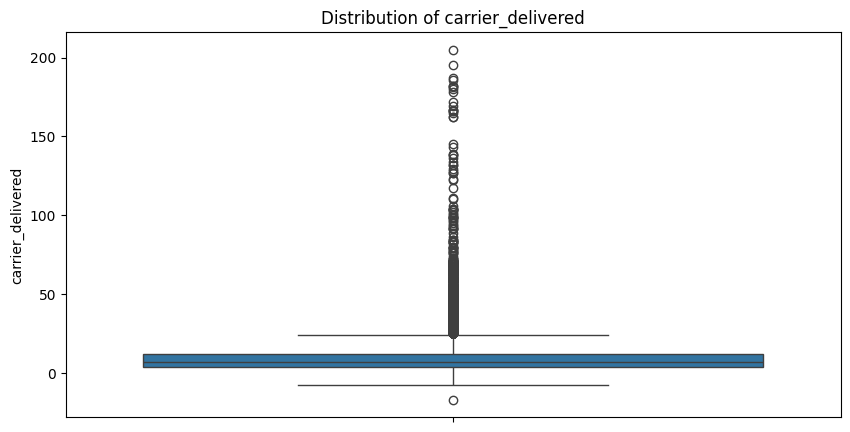

Skewness of delivered_estimated: -1.9782440592707093
Standard deviation of delivered_estimated: 10.179690834612144


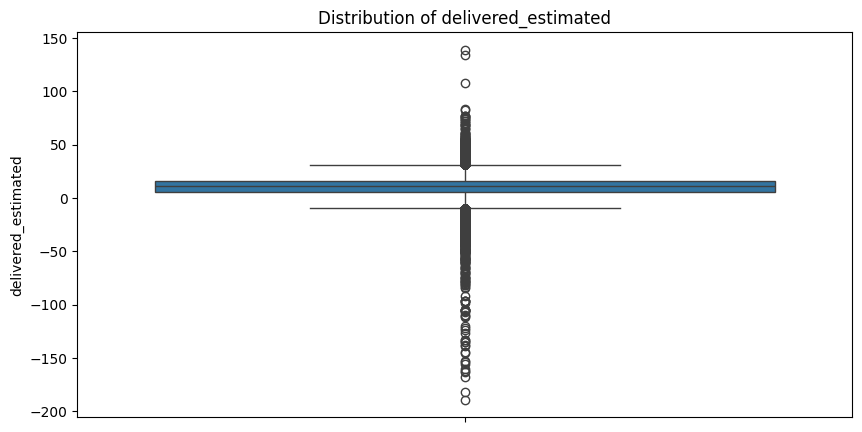

Skewness of purchased_delivered: 3.8010307066499847
Standard deviation of purchased_delivered: 9.531440067201514


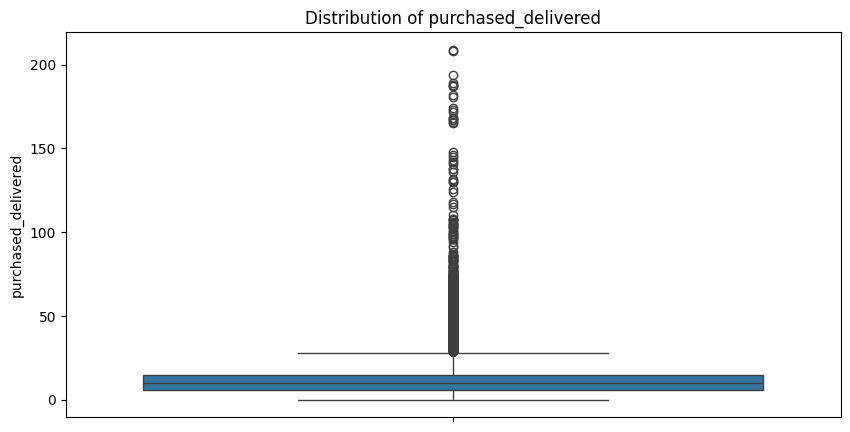

Skewness of Recency: 0.4655770551059691
Standard deviation of Recency: 152.41250426246924


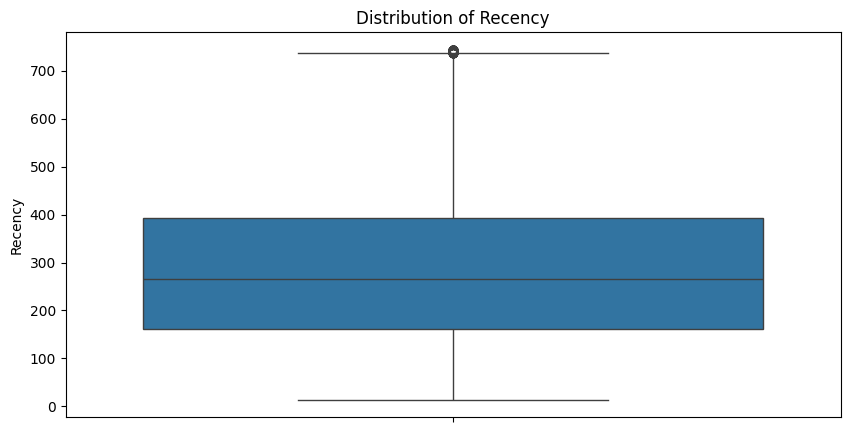

Skewness of Monetary: 7.73083575929393
Standard deviation of Monetary: 227.5219405794163


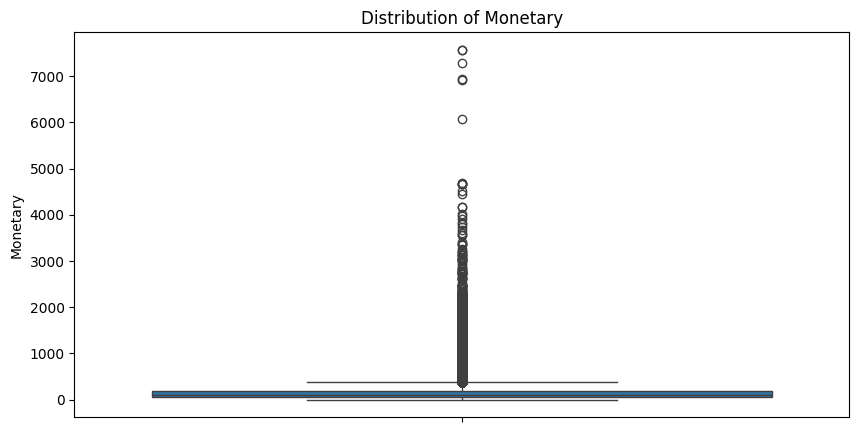

Skewness of Frequency: 15.917900004000256
Standard deviation of Frequency: 0.37671234697960765


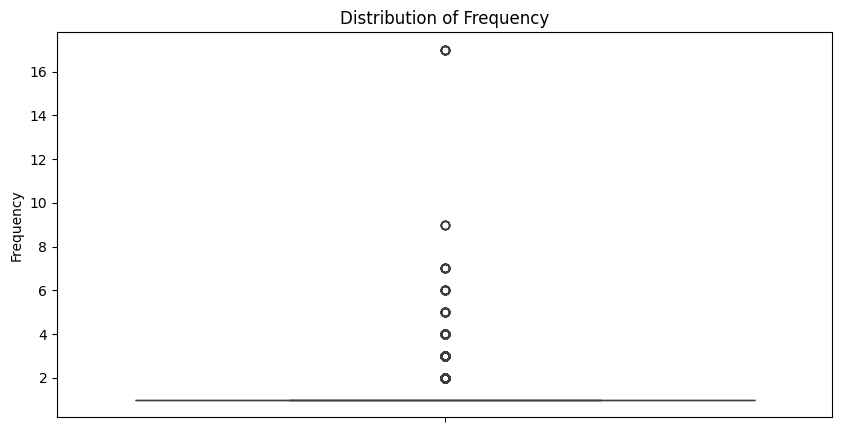

In [141]:
# Visualisasi distribusi awal dengan Boxplot
for col in X_train.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    print(f'Skewness of {col}: {X_train[col].skew()}')
    print(f'Standard deviation of {col}: {X_train[col].std()}')
    sns.boxplot(X_train[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [142]:
# Penanganan outlier menggunakan IQR
for col in X_train.select_dtypes(include=[np.number]).columns:
    q1 = X_train[col].quantile(0.25)
    q3 = X_train[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    X_train[col] = np.where(X_train[col] > upper_limit, upper_limit, X_train[col])
    X_train[col] = np.where(X_train[col] < lower_limit, lower_limit, X_train[col])


In [143]:
for col in X_test.select_dtypes(include=[np.number]).columns:
    q1 = X_train[col].quantile(0.25)  # Gunakan nilai dari X_train
    q3 = X_train[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    X_test[col] = np.where(X_test[col] > upper_limit, upper_limit, X_test[col])
    X_test[col] = np.where(X_test[col] < lower_limit, lower_limit, X_test[col])


## Drop Feature

In [144]:
# Kolom yang ingin dihapus
columns_to_drop = ['customer_zip_code_prefix', 'order_item_id', 'Frequency', 'payment_sequential','order_id', 'customer_id', 'customer_unique_id','product_id','order_purchase_timestamp','order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date','seller_id','review_id','review_answer_timestamp','review_creation_date','order_approved_at','geolocation_state','geolocation_city']

# Drop kolom pada X_train dan X_test
X_train.drop(columns=columns_to_drop, axis=1, inplace=True)
X_test.drop(columns=columns_to_drop, axis=1, inplace=True)

# Konfirmasi hasil
print("Kolom yang tersisa di X_train:")
print(X_train.columns)

print("\nKolom yang tersisa di X_test:")
print(X_test.columns)


Kolom yang tersisa di X_train:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state', 'review_score', 'payment_type',
       'payment_installments', 'payment_value', 'geolocation_lat',
       'geolocation_lng', 'purchased_approved', 'approved_carrier',
       'carrier_delivered', 'delivered_estimated', 'purchased_delivered',
       'Recency', 'Monetary'],
      dtype='object')

Kolom yang tersisa di X_test:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state', 'review_score', 'payment_type',
       'paymen

Skewness of product_name_length (after outlier treatment): -0.8761668272603571
Standard deviation of product_name_length (after outlier treatment): 9.91428510827855


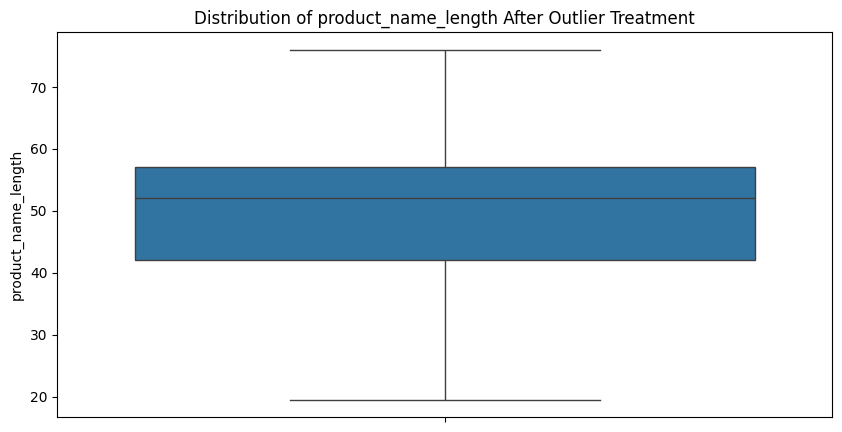

Skewness of product_description_length (after outlier treatment): 1.001019846954507
Standard deviation of product_description_length (after outlier treatment): 513.311218364157


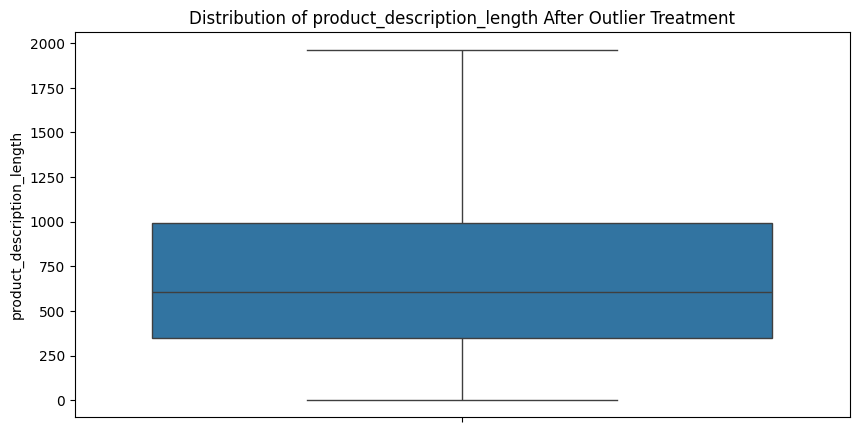

Skewness of product_photos_qty (after outlier treatment): 1.2039607101187229
Standard deviation of product_photos_qty (after outlier treatment): 1.5419043466151876


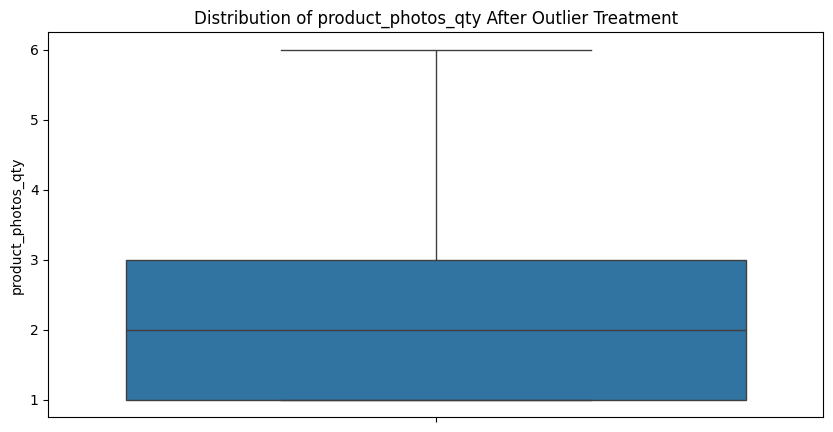

Skewness of product_weight_g (after outlier treatment): 1.1448187554993356
Standard deviation of product_weight_g (after outlier treatment): 1347.5438158519437


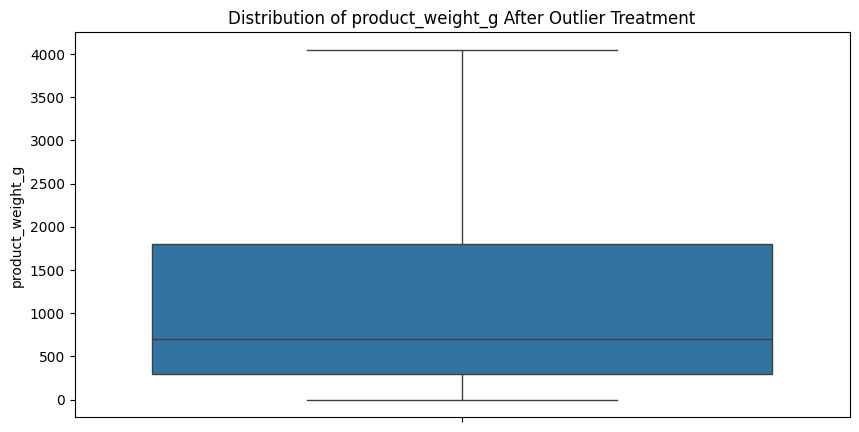

Skewness of product_length_cm (after outlier treatment): 1.1538784522100187
Standard deviation of product_length_cm (after outlier treatment): 14.253317059410737


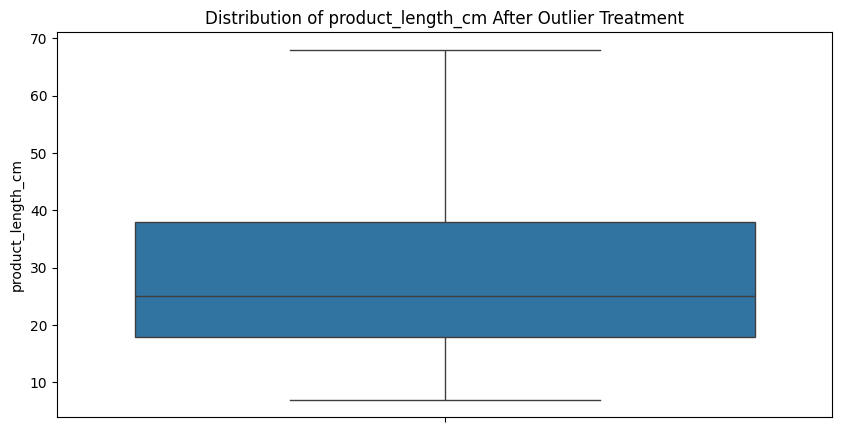

Skewness of product_height_cm (after outlier treatment): 0.8721935478723403
Standard deviation of product_height_cm (after outlier treatment): 9.83533799198049


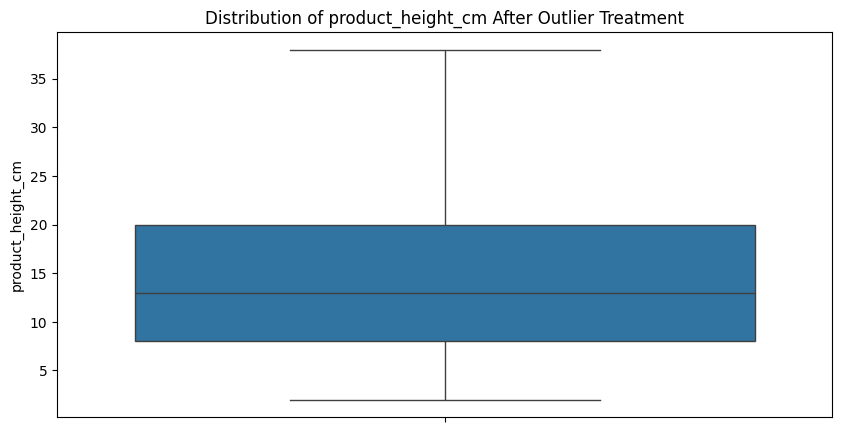

Skewness of product_width_cm (after outlier treatment): 1.0449871039883094
Standard deviation of product_width_cm (after outlier treatment): 10.558658275857383


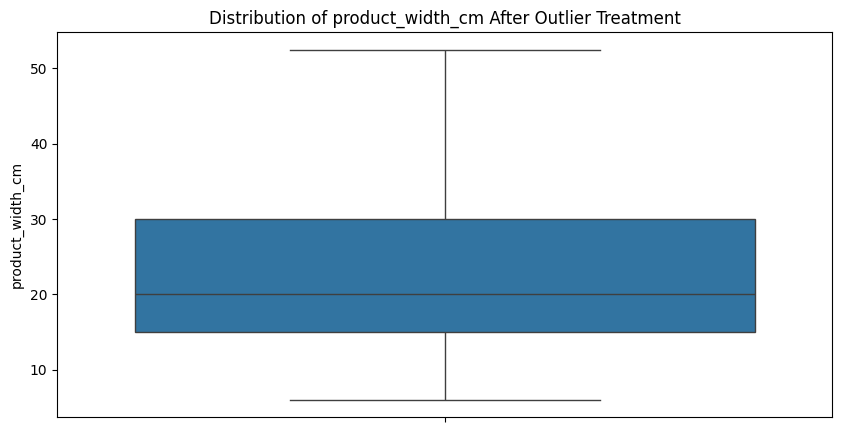

Skewness of review_score (after outlier treatment): -0.9558829535781257
Standard deviation of review_score (after outlier treatment): 0.9326220384769148


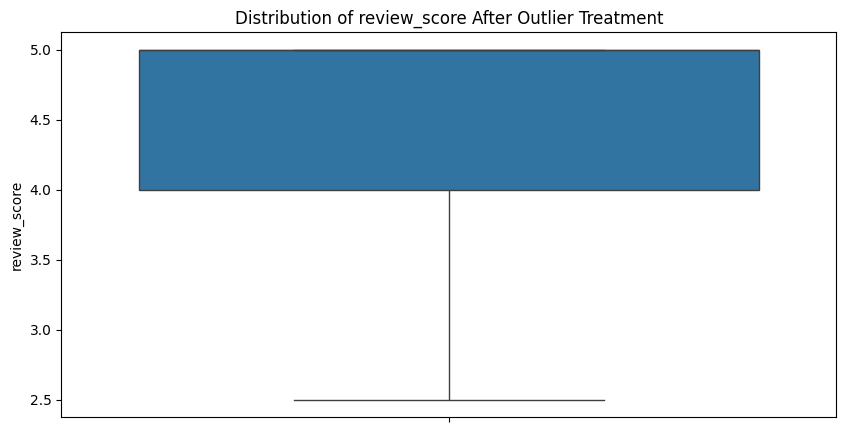

Skewness of payment_installments (after outlier treatment): 1.237411559918879
Standard deviation of payment_installments (after outlier treatment): 2.4210785030301336


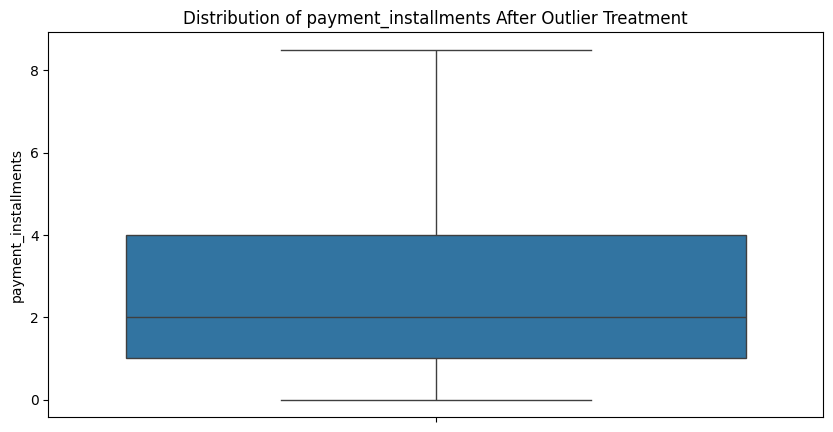

Skewness of payment_value (after outlier treatment): 1.0570024176730957
Standard deviation of payment_value (after outlier treatment): 92.96609882559724


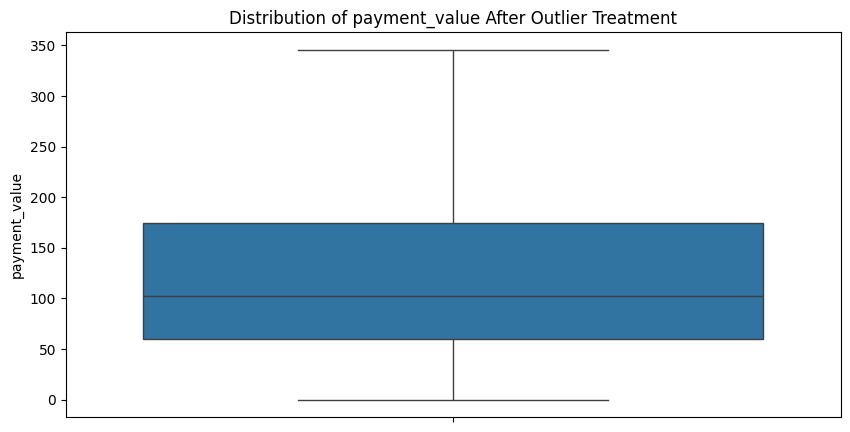

Skewness of geolocation_lat (after outlier treatment): 0.5205651234567185
Standard deviation of geolocation_lat (after outlier treatment): 3.594803198400021


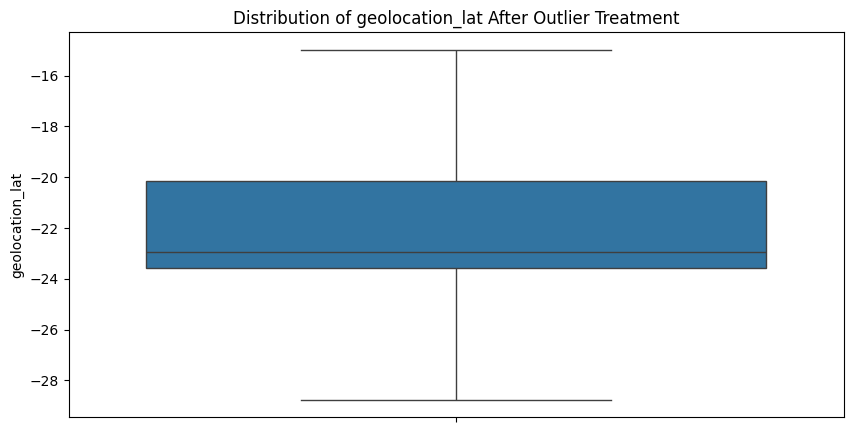

Skewness of geolocation_lng (after outlier treatment): 0.2593763569989063
Standard deviation of geolocation_lng (after outlier treatment): 3.7709727240970063


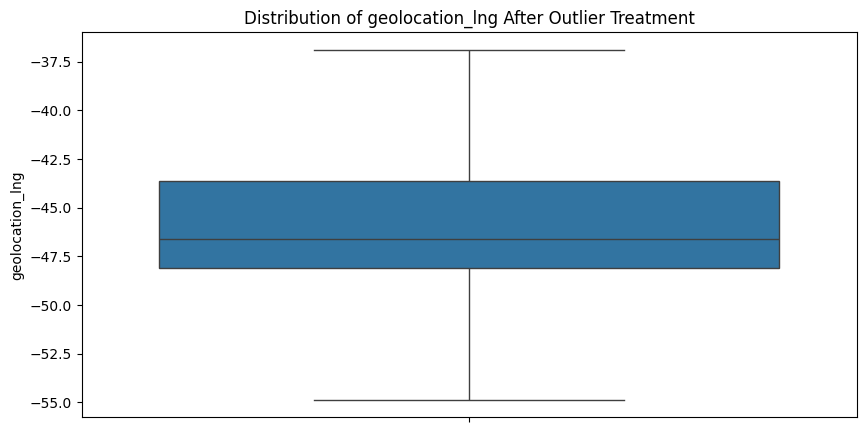

Skewness of purchased_approved (after outlier treatment): 1.219042188732239
Standard deviation of purchased_approved (after outlier treatment): 15354.983366316663


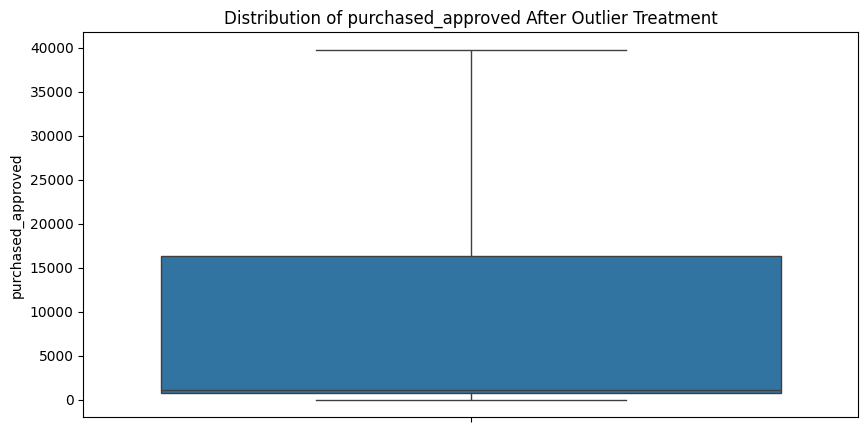

Skewness of approved_carrier (after outlier treatment): 1.0562627417741692
Standard deviation of approved_carrier (after outlier treatment): 2.19510254136595


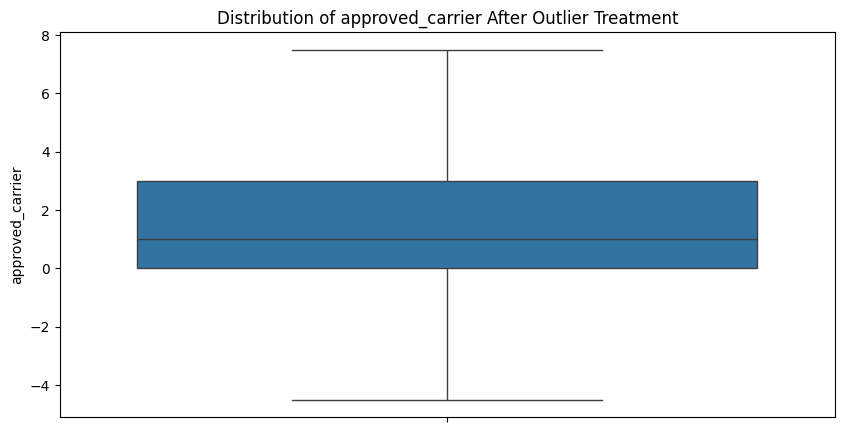

Skewness of carrier_delivered (after outlier treatment): 1.0085117704833022
Standard deviation of carrier_delivered (after outlier treatment): 6.288313920803598


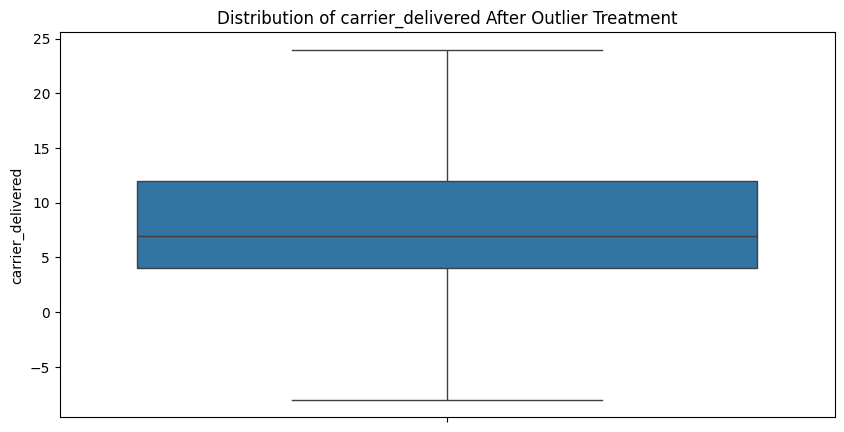

Skewness of delivered_estimated (after outlier treatment): -0.09785777146412132
Standard deviation of delivered_estimated (after outlier treatment): 8.285952241260988


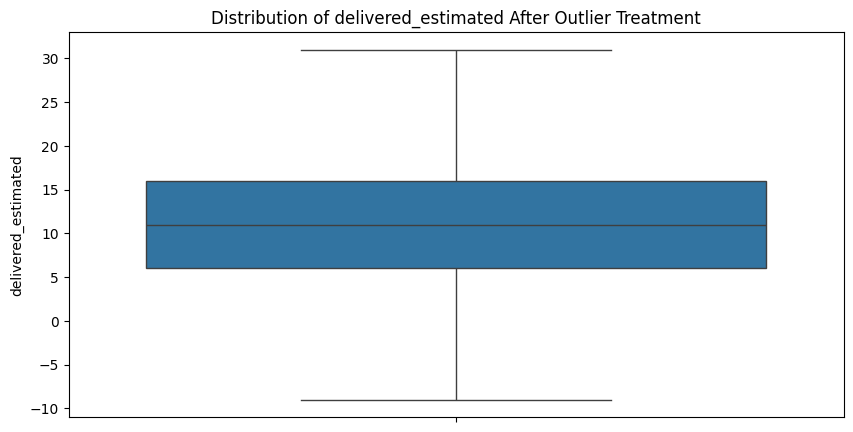

Skewness of purchased_delivered (after outlier treatment): 0.8856052514357678
Standard deviation of purchased_delivered (after outlier treatment): 7.117352114535369


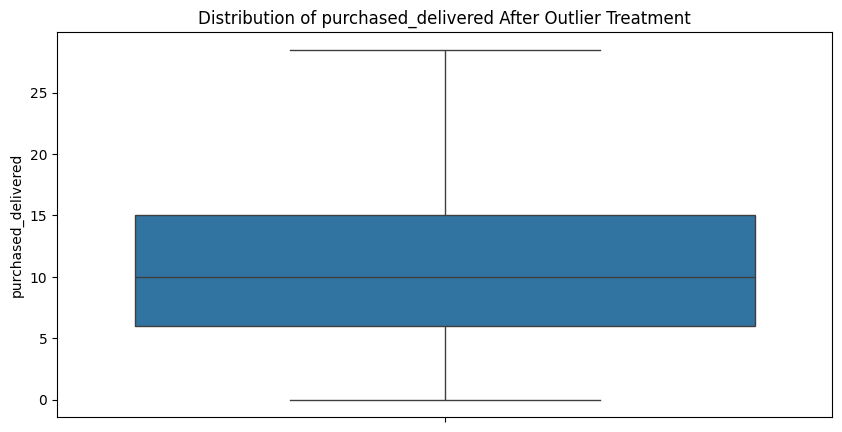

Skewness of Recency (after outlier treatment): 0.4643950558378764
Standard deviation of Recency (after outlier treatment): 152.38502830659306


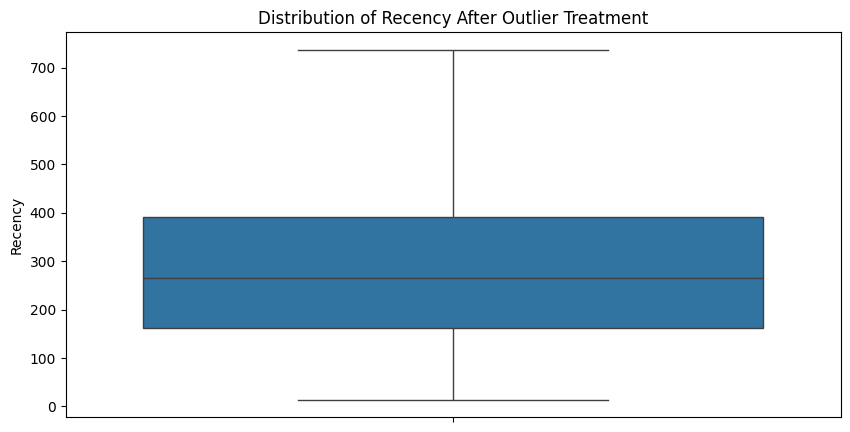

Skewness of Monetary (after outlier treatment): 1.0735499076383896
Standard deviation of Monetary (after outlier treatment): 101.05235109572148


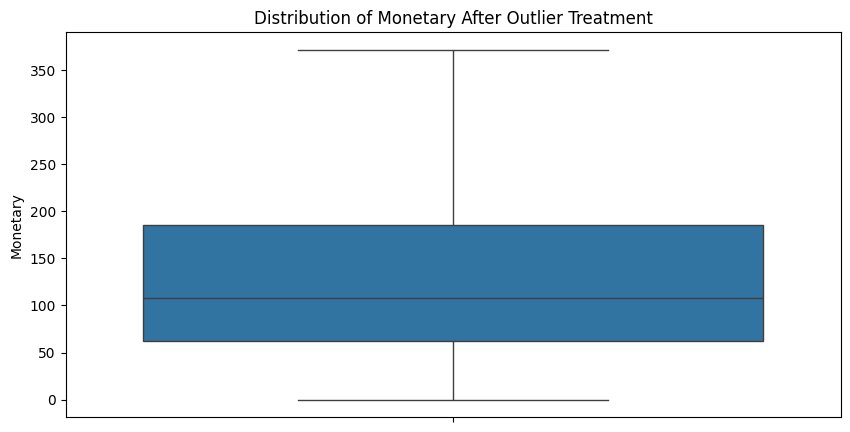

In [145]:
# Visualisasi distribusi setelah penanganan outlier
for col in X_train.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    print(f'Skewness of {col} (after outlier treatment): {X_train[col].skew()}')
    print(f'Standard deviation of {col} (after outlier treatment): {X_train[col].std()}')
    sns.boxplot(X_train[col])
    plt.title(f'Distribution of {col} After Outlier Treatment')
    plt.show()

In [146]:
X_train.shape

(74208, 26)

In [147]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74208 entries, 2819 to 11465
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_city               74208 non-null  object 
 1   customer_state              74208 non-null  object 
 2   order_status                74208 non-null  object 
 3   product_category_name       74208 non-null  object 
 4   product_name_length         74208 non-null  float64
 5   product_description_length  74208 non-null  float64
 6   product_photos_qty          74208 non-null  float64
 7   product_weight_g            74208 non-null  float64
 8   product_length_cm           74208 non-null  float64
 9   product_height_cm           74208 non-null  float64
 10  product_width_cm            74208 non-null  float64
 11  seller_city                 74208 non-null  object 
 12  seller_state                74208 non-null  object 
 13  review_score                74208

In [148]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18552 entries, 55943 to 32490
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_city               18552 non-null  object 
 1   customer_state              18552 non-null  object 
 2   order_status                18552 non-null  object 
 3   product_category_name       18552 non-null  object 
 4   product_name_length         18552 non-null  float64
 5   product_description_length  18552 non-null  float64
 6   product_photos_qty          18552 non-null  float64
 7   product_weight_g            18552 non-null  float64
 8   product_length_cm           18552 non-null  float64
 9   product_height_cm           18552 non-null  float64
 10  product_width_cm            18552 non-null  float64
 11  seller_city                 18552 non-null  object 
 12  seller_state                18552 non-null  object 
 13  review_score                1855

## Missing Value

In [149]:
X_train.isna().sum() / len(final) * 100

customer_city                0.000000
customer_state               0.000000
order_status                 0.000000
product_category_name        0.000000
product_name_length          0.000000
product_description_length   0.000000
product_photos_qty           0.000000
product_weight_g             0.000000
product_length_cm            0.000000
product_height_cm            0.000000
product_width_cm             0.000000
seller_city                  0.000000
seller_state                 0.000000
review_score                 0.000000
payment_type                 0.000000
payment_installments         0.000000
payment_value                0.000000
geolocation_lat              0.000000
geolocation_lng              0.000000
purchased_approved           0.000000
approved_carrier             0.000000
carrier_delivered            0.000000
delivered_estimated          0.000000
purchased_delivered          0.000000
Recency                      0.000000
Monetary                     0.000000
dtype: float

In [150]:
X_test.isna().sum() / len(final) * 100

customer_city                0.000000
customer_state               0.000000
order_status                 0.000000
product_category_name        0.000000
product_name_length          0.000000
product_description_length   0.000000
product_photos_qty           0.000000
product_weight_g             0.000000
product_length_cm            0.000000
product_height_cm            0.000000
product_width_cm             0.000000
seller_city                  0.000000
seller_state                 0.000000
review_score                 0.000000
payment_type                 0.000000
payment_installments         0.000000
payment_value                0.000000
geolocation_lat              0.000000
geolocation_lng              0.000000
purchased_approved           0.000000
approved_carrier             0.000000
carrier_delivered            0.000000
delivered_estimated          0.000000
purchased_delivered          0.000000
Recency                      0.000000
Monetary                     0.000000
dtype: float

The outliers are treated by the method of capping.
Values which fall outside of the upper and lower whisker are capped to the upper and lower whisker values respectively.
Since dropping the values would lead to loss of huge volumes of data, we prefer to cap the values.

## Correlation Matrix of Numerical Variables

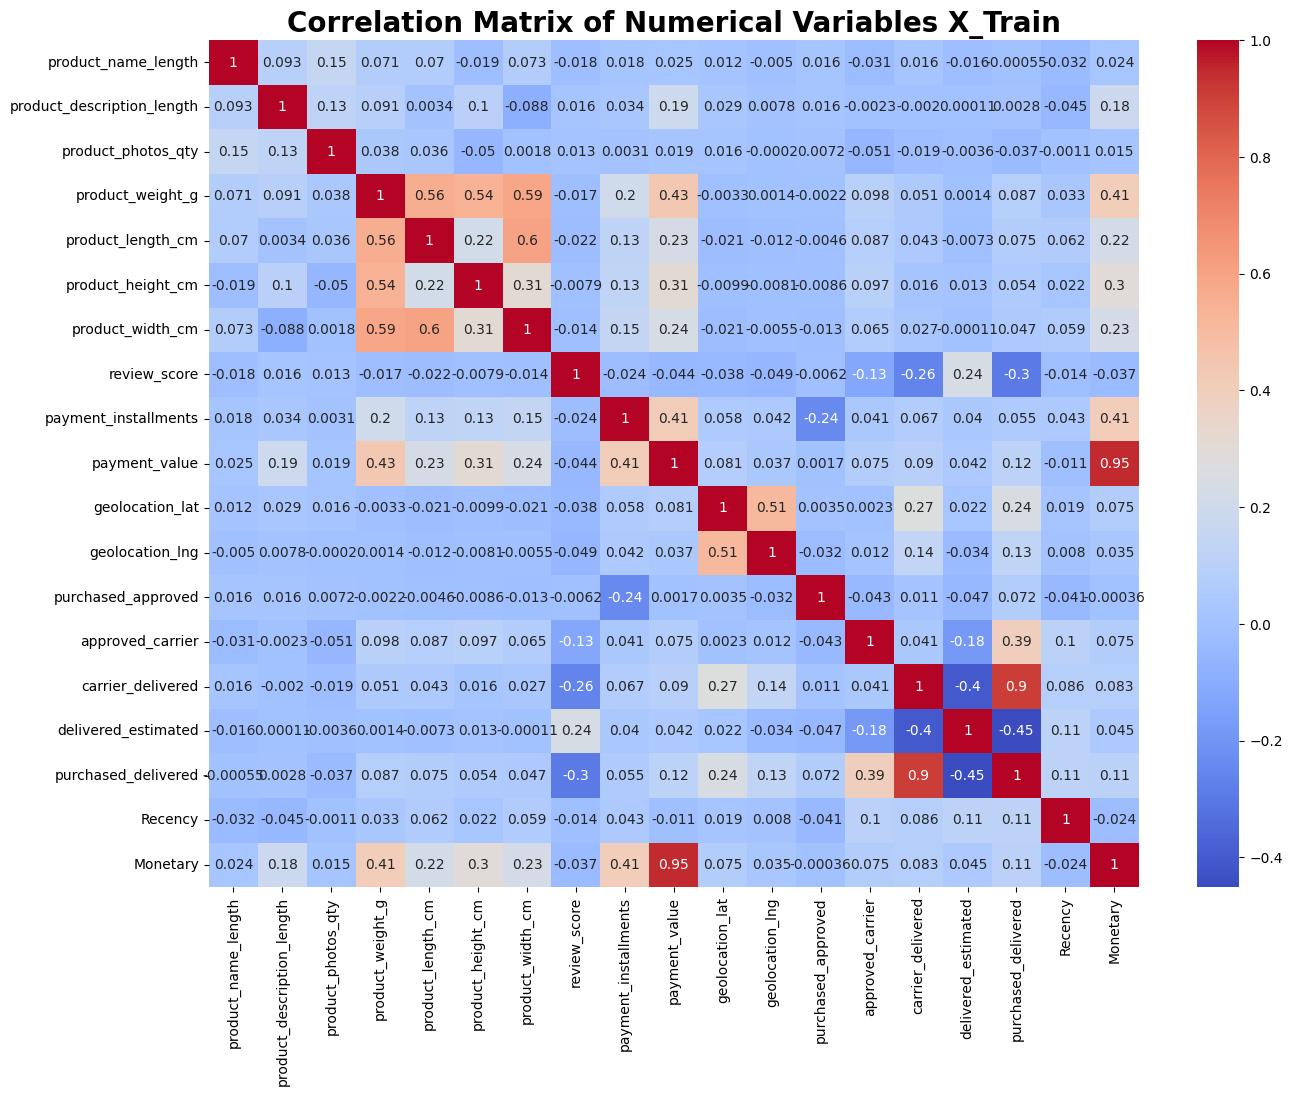

In [151]:
# Memilih hanya kolom numerik dari DataFrame
numerical_data = X_train.select_dtypes(include=['number'])

# Plot heatmap korelasi
plt.figure(figsize=(15, 11))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables X_Train', fontsize=20, fontweight='bold')
plt.show()

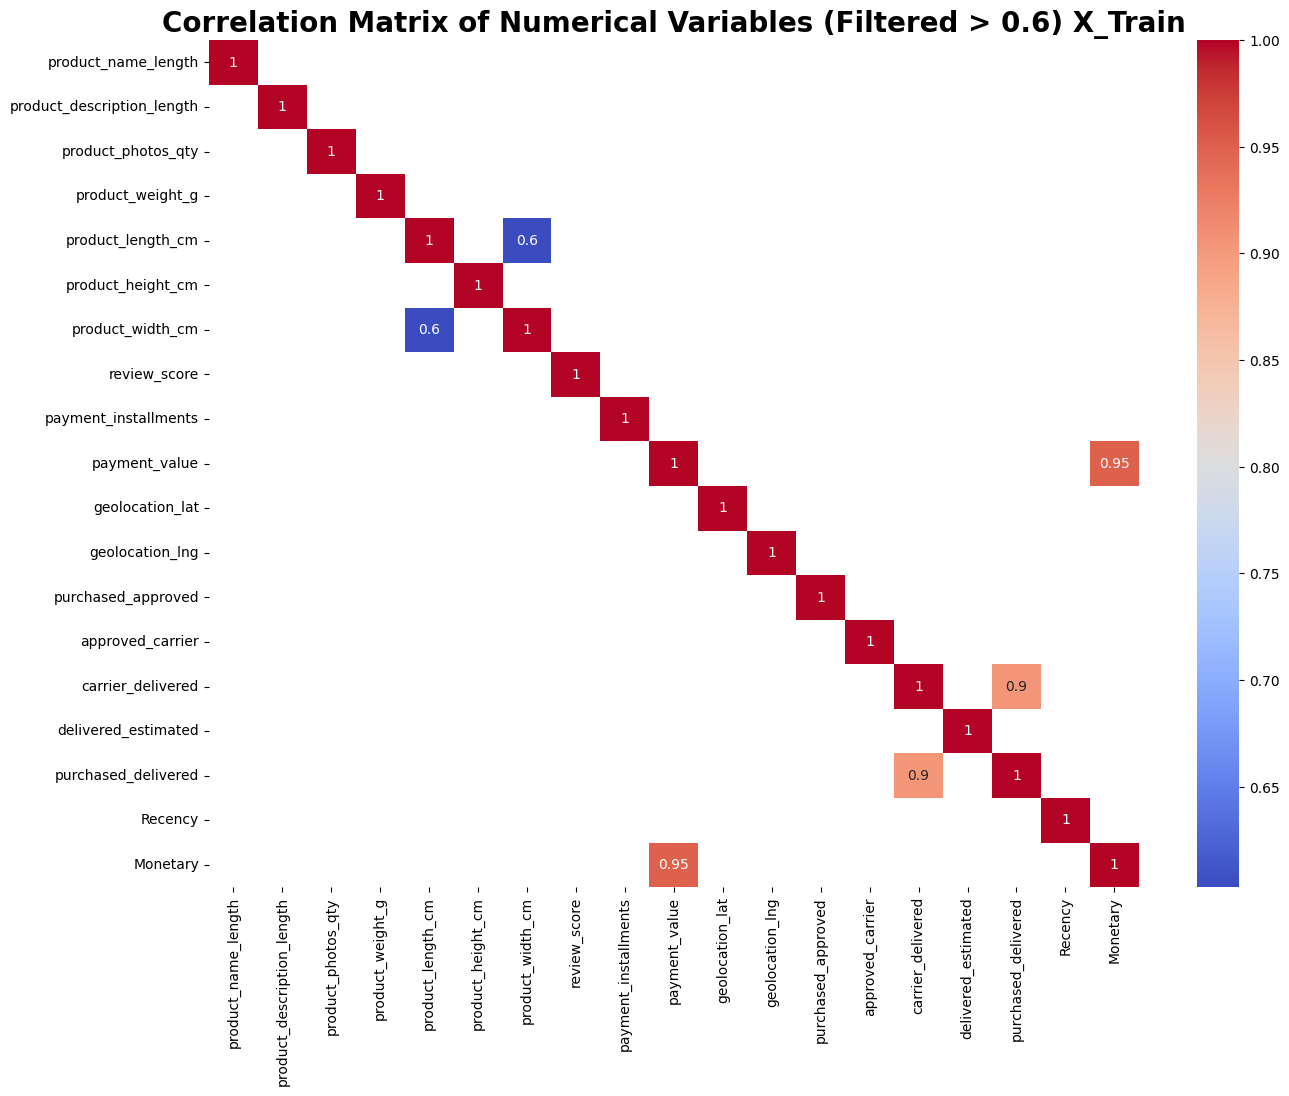

In [152]:
# Memilih hanya kolom numerik
numerical_data = X_train.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Memfilter nilai korelasi > 0.6 (selain diagonal 1.0)
filtered_corr = correlation_matrix.where(correlation_matrix > 0.6)

# Plot heatmap
plt.figure(figsize=(15, 11))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', mask=filtered_corr.isnull())
plt.title('Correlation Matrix of Numerical Variables (Filtered > 0.6) X_Train', fontsize=20, fontweight='bold')
plt.show()


In [153]:
X_train

,customer_city,customer_state,order_status,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,review_score,payment_type,payment_installments,payment_value,geolocation_lat,geolocation_lng,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered,Recency,Monetary
2819,Vinukonda,Andhra Pradesh,delivered,Sports_Leisure,36.000000,410.000000,1.000000,1086.000000,24.000000,24.000000,22.000000,Singapur,Andhra Pradesh,5.000000,UPI,1.000000,117.970000,-23.619889,-46.554965,17640.000000,0.000000,2.000000,18.000000,4.000000,269.000000,117.970000
50977,Dowleswaram,Andhra Pradesh,delivered,Fashion_Bags_Accessories,50.000000,411.000000,5.000000,150.000000,16.000000,5.000000,20.000000,Akkarampalle,Andhra Pradesh,5.000000,UPI,1.000000,67.530000,-14.980665,-38.500435,39780.000000,2.000000,4.000000,30.000000,7.000000,355.000000,67.530000
50428,Kiraoli,Uttar Pradesh,delivered,Audio,47.000000,423.000000,1.000000,250.000000,27.000000,5.000000,20.000000,Akkarampalle,Andhra Pradesh,5.000000,credit_card,3.000000,30.000000,-28.756533,-53.159138,4080.000000,2.000000,13.000000,13.000000,18.000000,327.000000,30.000000
63671,Badepalle,Andhra Pradesh,delivered,Sports_Leisure,53.000000,1964.000000,6.000000,250.000000,28.000000,13.000000,14.000000,Devanhalli,Karnataka,5.000000,credit_card,5.000000,52.590000,-22.979381,-43.332765,540.000000,0.000000,9.000000,8.000000,9.000000,324.000000,52.590000
52110,Ramagundam,Andhra Pradesh,delivered,Housewares,39.000000,412.000000,1.000000,675.000000,18.000000,21.000000,16.000000,Akkarampalle,Andhra Pradesh,5.000000,credit_card,3.000000,75.500000,-22.723784,-43.339365,39780.000000,0.000000,7.000000,13.000000,8.000000,74.000000,75.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,Arang,Chhattisgarh,delivered,Food_Drink,28.000000,371.000000,2.000000,1200.000000,23.000000,12.000000,19.000000,Maheshtala,West Bengal,5.000000,voucher,1.000000,34.310000,-22.282321,-42.539836,660.000000,1.000000,14.000000,25.000000,16.000000,279.000000,34.310000
25350,Mahendragarh,Haryana,delivered,Health_Beauty,58.000000,1964.000000,1.000000,3100.000000,20.000000,20.000000,16.000000,Bandarulanka,Andhra Pradesh,3.000000,credit_card,4.000000,166.580000,-24.011288,-46.418734,720.000000,1.000000,3.000000,12.000000,4.000000,408.000000,166.580000
97453,Eluru,Andhra Pradesh,delivered,Home_Construction,57.000000,707.000000,1.000000,4050.000000,30.000000,38.000000,30.000000,Akkarampalle,Andhra Pradesh,3.000000,UPI,1.000000,319.130000,-28.756533,-51.208637,21660.000000,2.000000,15.000000,5.000000,19.000000,277.000000,319.130000
70862,Vastral,Gujarat,delivered,Bed_Bath_Table,57.000000,364.000000,2.000000,800.000000,45.000000,10.000000,34.000000,Tarsali,Gujarat,5.000000,UPI,1.000000,112.840000,-19.761094,-44.081680,39660.000000,0.000000,6.000000,16.000000,7.000000,65.000000,190.080000


## Normalisasi

In [154]:
# Untuk X_train
numeric_cols_train = X_train.select_dtypes(include=[np.number]).columns
skewness_train = X_train[numeric_cols_train].skew()

# Untuk X_test
numeric_cols_test = X_test.select_dtypes(include=[np.number]).columns
skewness_test = X_test[numeric_cols_test].skew()

# Menampilkan skewness
print("Skewness for X_train:")
print(skewness_train)

print("\nSkewness for X_test:")
print(skewness_test)



Skewness for X_train:
product_name_length          -0.876167
product_description_length    1.001020
product_photos_qty            1.203961
product_weight_g              1.144819
product_length_cm             1.153878
product_height_cm             0.872194
product_width_cm              1.044987
review_score                 -0.955883
payment_installments          1.237412
payment_value                 1.057002
geolocation_lat               0.520565
geolocation_lng               0.259376
purchased_approved            1.219042
approved_carrier              1.056263
carrier_delivered             1.008512
delivered_estimated          -0.097858
purchased_delivered           0.885605
Recency                       0.464395
Monetary                      1.073550
dtype: float64

Skewness for X_test:
product_name_length          -0.868712
product_description_length    0.999942
product_photos_qty            1.181398
product_weight_g              1.152777
product_length_cm             1.164195
produ

Jika skewness mendekati 0, distribusi data dianggap simetris atau mendekati normal.
Jika skewness positif, data miring ke kanan (tail kanan lebih panjang).
Jika skewness negatif, data miring ke kiri (tail kiri lebih panjang).

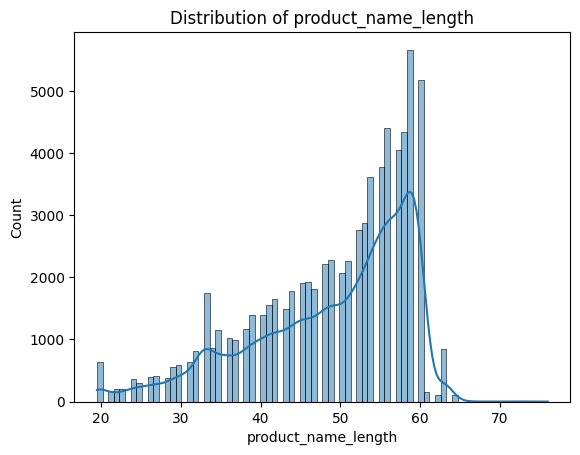

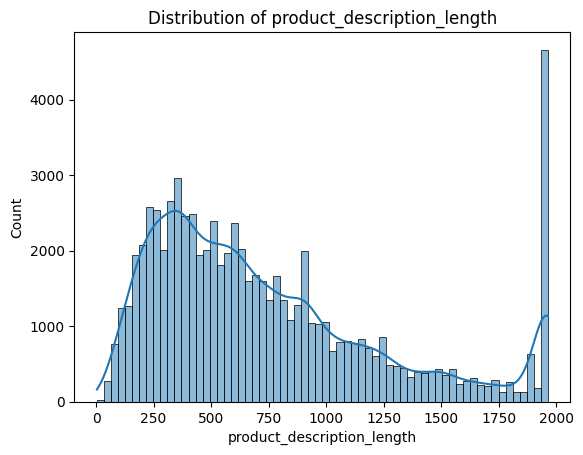

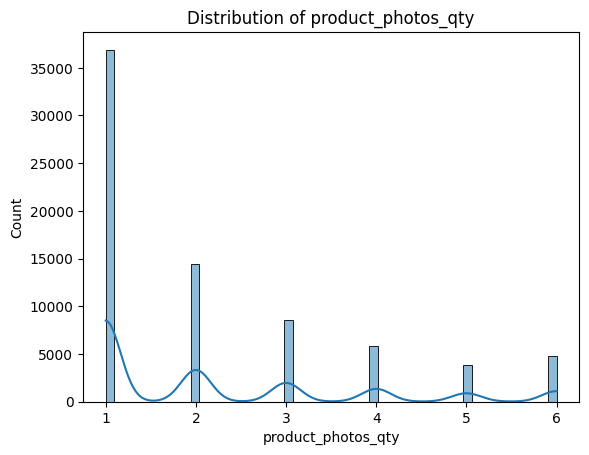

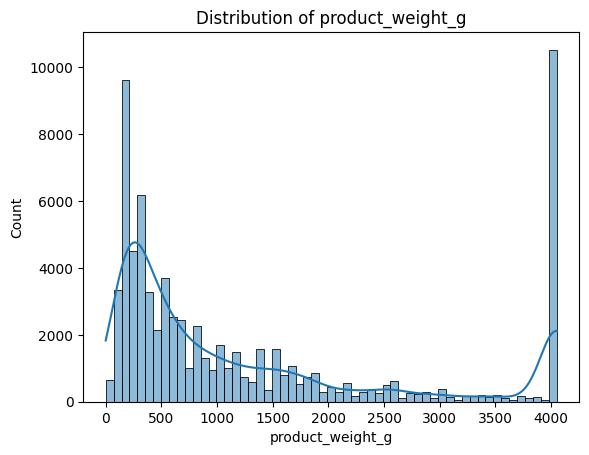

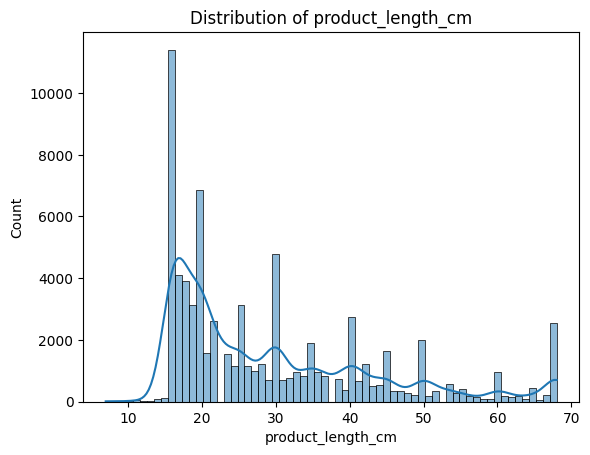

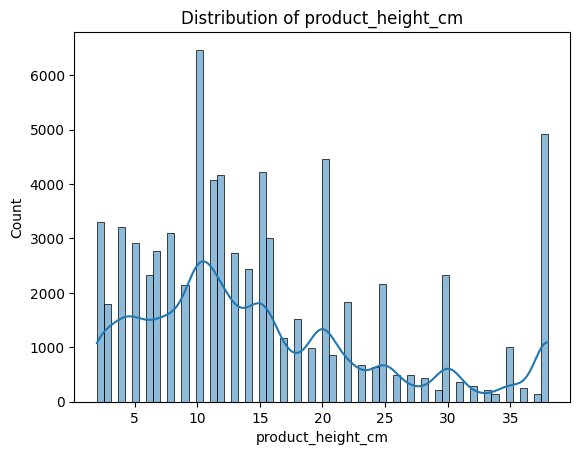

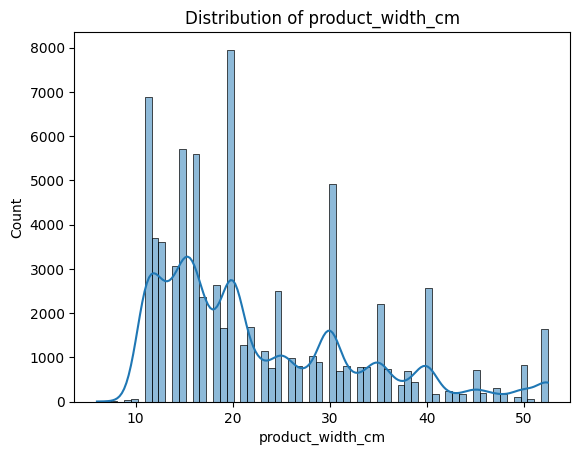

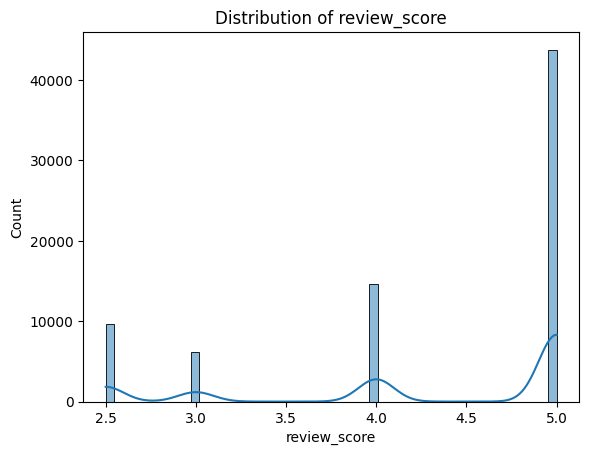

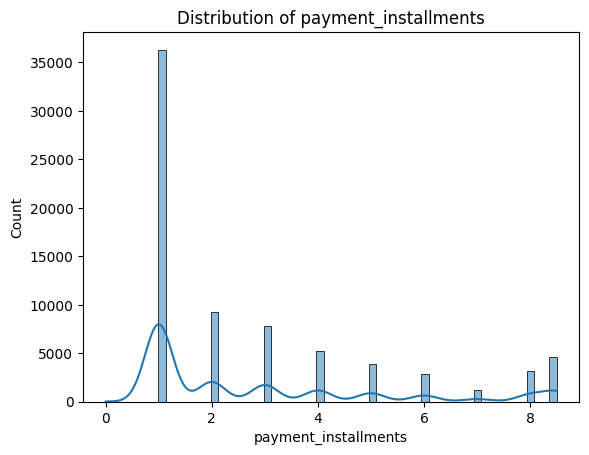

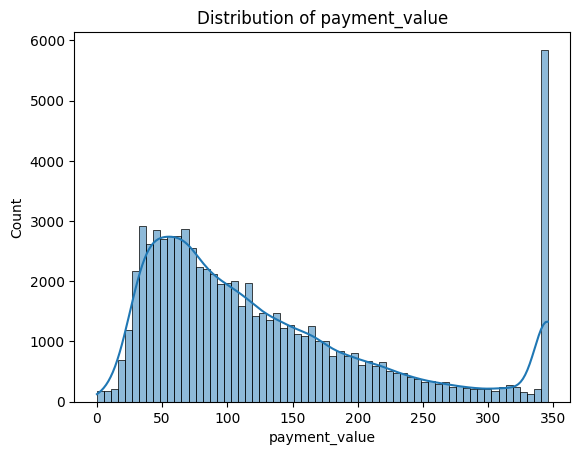

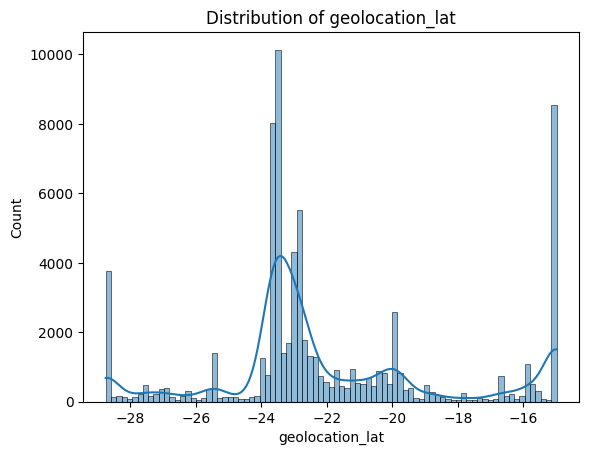

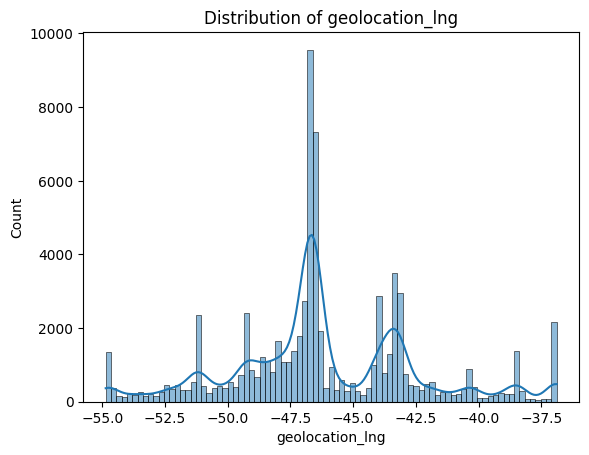

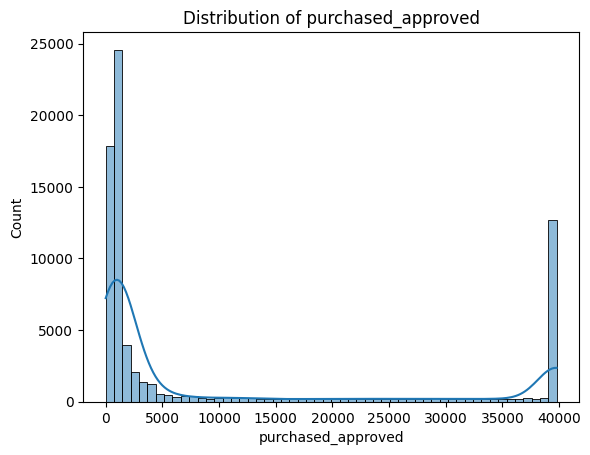

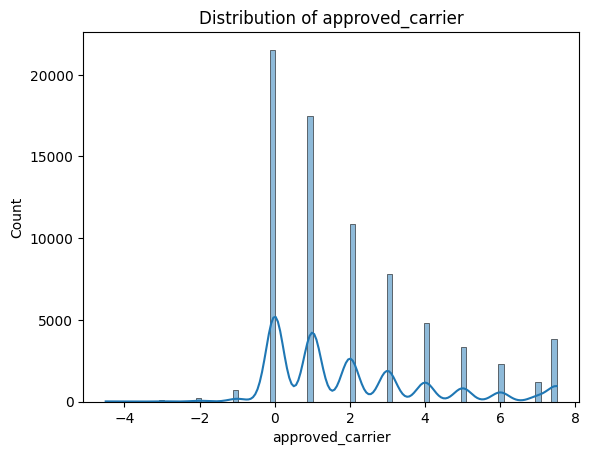

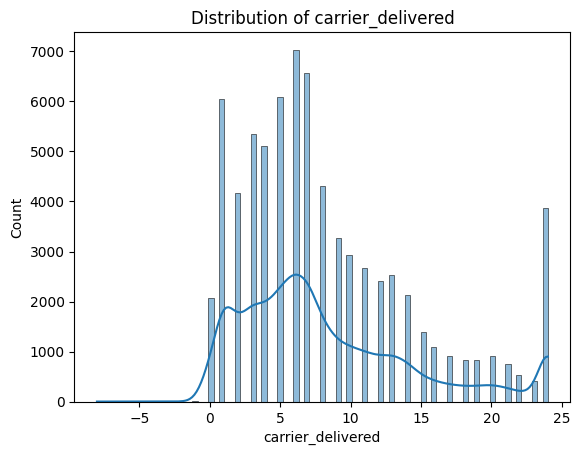

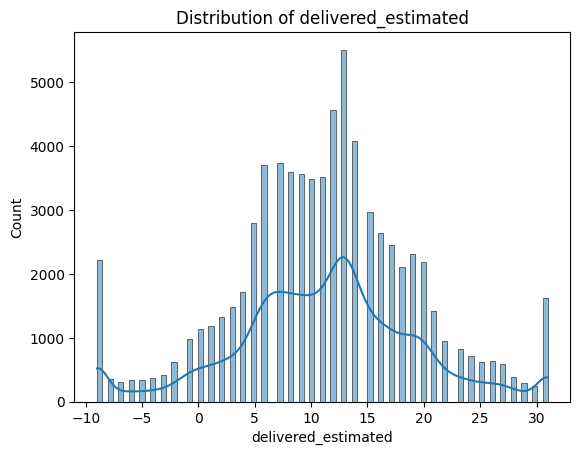

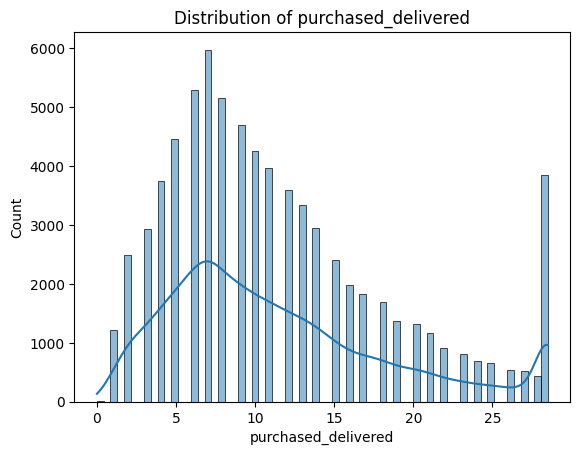

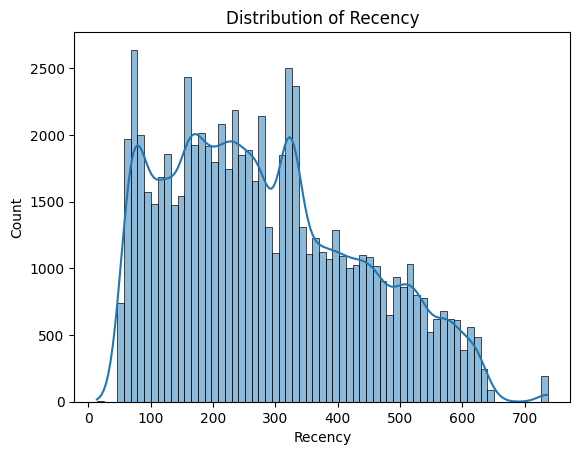

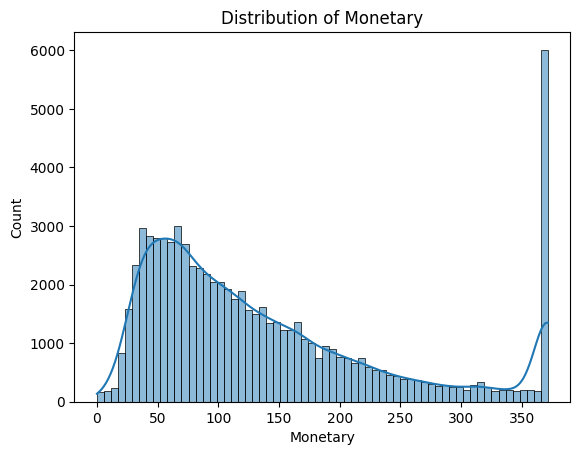

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in X_train.select_dtypes(include=[np.number]).columns:
    sns.histplot(X_train[col], kde=True)  # dengan Kernel Density Estimation
    plt.title(f"Distribution of {col}")
    plt.show()



In [156]:
X_train.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,payment_installments,payment_value,geolocation_lat,geolocation_lng,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered,Recency,Monetary
count,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000,74208.000000
mean,48.908433,747.052851,2.183552,1300.743033,29.514217,15.325585,22.674058,4.311146,2.804718,130.759193,-21.929506,-46.173295,10339.085543,1.993471,8.298647,11.131266,11.467335,284.404471,138.972046
std,9.914285,513.311218,1.541904,1347.543816,14.253317,9.835338,10.558658,0.932622,2.421079,92.966099,3.594803,3.770973,15354.983366,2.195103,6.288314,8.285952,7.117352,152.385028,101.052351
min,19.500000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,2.500000,0.000000,0.000000,-28.756533,-54.861967,0.000000,-4.500000,-8.000000,-9.000000,0.000000,14.000000,0.000000
25%,42.000000,349.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000,1.000000,59.815000,-23.590582,-48.121198,780.000000,0.000000,4.000000,6.000000,6.000000,162.000000,62.140000
50%,52.000000,608.000000,2.000000,700.000000,25.000000,13.000000,20.000000,5.000000,2.000000,102.640000,-22.927115,-46.631994,1140.000000,1.000000,7.000000,11.000000,10.000000,265.000000,107.705000
75%,57.000000,995.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000,4.000000,174.160000,-20.146615,-43.627351,16380.000000,3.000000,12.000000,16.000000,15.000000,392.000000,185.890000
max,76.000000,1964.000000,6.000000,4050.000000,68.000000,38.000000,52.500000,5.000000,8.500000,345.677500,-14.980665,-36.886582,39780.000000,7.500000,24.000000,31.000000,28.500000,737.000000,371.515000


In [157]:
from sklearn.preprocessing import PowerTransformer

# Kolom yang perlu di-transformasi berdasarkan skewness
columns_to_transform = ['product_description_length', 'product_photos_qty', 'product_weight_g',
                        'product_length_cm', 'product_height_cm', 'product_width_cm', 
                        'payment_installments', 'payment_value', 'purchased_approved',
                        'approved_carrier', 'carrier_delivered', 'Monetary']

# Inisialisasi PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Fit dan transformasi data X_train
X_train[columns_to_transform] = pt.fit_transform(X_train[columns_to_transform])

# Terapkan transformasi yang sama pada X_test
X_test[columns_to_transform] = pt.transform(X_test[columns_to_transform])

# Tampilkan hasil beberapa kolom yang sudah ditransformasi
print(X_train[columns_to_transform].head())
print(X_test[columns_to_transform].head())


       product_description_length  product_photos_qty  product_weight_g  \
2819                    -0.533393           -0.945062          0.356581   
50977                   -0.530318            1.497930         -1.370652   
50428                   -0.493880           -0.945062         -0.926471   
63671                    1.800556            1.632455         -0.926471   
52110                   -0.527250           -0.945062         -0.059515   

       product_length_cm  product_height_cm  product_width_cm  \
2819           -0.107430           0.959328          0.254220   
50977          -1.308225          -1.212768          0.032117   
50428           0.183219          -1.212768          0.032117   
63671           0.268230          -0.018446         -0.886482   
52110          -0.924902           0.731283         -0.525969   

       payment_installments  payment_value  purchased_approved  \
2819              -0.946289       0.149942            1.062154   
50977             -0.94628

In [158]:
# Untuk X_train
numeric_cols_train = X_train.select_dtypes(include=[np.number]).columns
skewness_train = X_train[numeric_cols_train].skew()

# Untuk X_test
numeric_cols_test = X_test.select_dtypes(include=[np.number]).columns
skewness_test = X_test[numeric_cols_test].skew()

# Menampilkan skewness
print("Skewness for X_train:")
print(skewness_train)

print("\nSkewness for X_test:")
print(skewness_test)



Skewness for X_train:
product_name_length          -0.876167
product_description_length   -0.026841
product_photos_qty            0.319858
product_weight_g             -0.000559
product_length_cm             0.123539
product_height_cm            -0.031972
product_width_cm              0.075745
review_score                 -0.955883
payment_installments          0.329996
payment_value                -0.010429
geolocation_lat               0.520565
geolocation_lng               0.259376
purchased_approved            0.027591
approved_carrier             -0.313951
carrier_delivered            -0.147956
delivered_estimated          -0.097858
purchased_delivered           0.885605
Recency                       0.464395
Monetary                     -0.011034
dtype: float64

Skewness for X_test:
product_name_length          -0.868712
product_description_length   -0.019606
product_photos_qty            0.296017
product_weight_g              0.005199
product_length_cm             0.158401
produ

# 5. Feature encoding

In [159]:
# Cek kolom bertipe string di X_train
string_columns_train = X_train.select_dtypes(include='object').columns
print(f"Kolom bertipe string di X_train:\n{string_columns_train}\n")

# Cek kolom bertipe string di X_test
string_columns_test = X_test.select_dtypes(include='object').columns
print(f"Kolom bertipe string di X_test:\n{string_columns_test}\n")

# Periksa apakah kolom string di X_train dan X_test konsisten
if set(string_columns_train) == set(string_columns_test):
    print("Kolom string di X_train dan X_test konsisten.")
else:
    print("Kolom string di X_train dan X_test berbeda.")
    print(f"Kolom string yang ada di X_train tetapi tidak di X_test: {set(string_columns_train) - set(string_columns_test)}")
    print(f"Kolom string yang ada di X_test tetapi tidak di X_train: {set(string_columns_test) - set(string_columns_train)}")


Kolom bertipe string di X_train:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'seller_city', 'seller_state', 'payment_type'],
      dtype='object')

Kolom bertipe string di X_test:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'seller_city', 'seller_state', 'payment_type'],
      dtype='object')

Kolom string di X_train dan X_test konsisten.


In [161]:
# Cek kolom bertipe string di X_train
string_columns_train = X_train.select_dtypes(include='object').columns
print(f"Kolom bertipe string di X_train:\n{string_columns_train}\n")

# Cek kolom bertipe string di X_test
string_columns_test = X_test.select_dtypes(include='object').columns
print(f"Kolom bertipe string di X_test:\n{string_columns_test}\n")

Kolom bertipe string di X_train:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'seller_city', 'seller_state', 'payment_type'],
      dtype='object')

Kolom bertipe string di X_test:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'seller_city', 'seller_state', 'payment_type'],
      dtype='object')



In [164]:
# Hapus kolom bertipe string dari X_train
X_train = X_train.drop(columns=X_train.select_dtypes(include='object').columns)

# Hapus kolom bertipe string dari X_test
X_test = X_test.drop(columns=X_test.select_dtypes(include='object').columns)


In [160]:
# from sklearn.preprocessing import LabelEncoder

# # 1. Apply One-Hot Encoding to nominal categorical columns
# X_train_encoded = pd.get_dummies(X_train, columns=['customer_city', 'customer_state', 'seller_city', 'seller_state', 'product_category_name', 'payment_type'], drop_first=True)
# X_test_encoded = pd.get_dummies(X_test, columns=['customer_city', 'customer_state', 'seller_city', 'seller_state', 'product_category_name', 'payment_type'], drop_first=True)

# # 2. Apply Label Encoding to the ordinal 'order_status' column
# le = LabelEncoder()
# X_train_encoded['order_status_encoded'] = le.fit_transform(X_train_encoded['order_status'])
# X_test_encoded['order_status_encoded'] = le.transform(X_test_encoded['order_status'])  # Use the same transformation for X_test

# # Drop the original 'order_status' column after encoding
# X_train_encoded.drop(['order_status'], axis=1, inplace=True)
# X_test_encoded.drop(['order_status'], axis=1, inplace=True)

# # Drop other columns that are no longer needed
# # If there are any extra columns not needed after encoding (such as the old non-encoded versions)
# # columns_to_drop = ['customer_city', 'customer_state', 'seller_city', 'seller_state', 'product_category_name', 'payment_type']
# # X_train_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)
# # X_test_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)



KeyError: "['customer_city', 'customer_state', 'seller_city', 'seller_state', 'product_category_name', 'payment_type'] not found in axis"

In [165]:
X_train

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,payment_installments,payment_value,geolocation_lat,geolocation_lng,purchased_approved,approved_carrier,carrier_delivered,delivered_estimated,purchased_delivered,Recency,Monetary
2819,36.000000,-0.533393,-0.945062,0.356581,-0.107430,0.959328,0.254220,5.000000,-0.946289,0.149942,-23.619889,-46.554965,1.062154,-0.994346,-1.145439,18.000000,4.000000,269.000000,0.082495
50977,50.000000,-0.530318,1.497930,-1.370652,-1.308225,-1.212768,0.032117,5.000000,-0.946289,-0.583012,-14.980665,-38.500435,1.547516,0.207123,-0.593900,30.000000,7.000000,355.000000,-0.630707
50428,47.000000,-0.493880,-0.945062,-0.926471,0.183219,-1.212768,0.032117,5.000000,0.684083,-1.530826,-28.756533,-53.159138,0.232118,0.207123,0.864990,13.000000,18.000000,327.000000,-1.561219
63671,53.000000,1.800556,1.632455,-0.926471,0.268230,-0.018446,-0.886482,5.000000,1.208202,-0.889672,-22.979381,-43.332765,-0.827020,-0.994346,0.329741,8.000000,9.000000,324.000000,-0.930703
52110,39.000000,-0.527250,-0.945062,-0.059515,-0.924902,0.731283,-0.525969,5.000000,0.684083,-0.441893,-22.723784,-43.339365,1.547516,-0.994346,0.007780,13.000000,8.000000,74.000000,-0.492981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,28.000000,-0.658211,0.387660,0.443987,-0.218446,-0.133407,-0.091379,5.000000,-0.946289,-1.383348,-22.282321,-42.539836,-0.726282,-0.302056,0.982693,25.000000,16.000000,279.000000,-1.415779
25350,58.000000,1.800556,-0.945062,1.275969,-0.606751,0.650106,-0.525969,3.000000,1.000167,0.638515,-24.011288,-46.418734,-0.682308,-0.302056,-0.846914,12.000000,4.000000,408.000000,0.555098
97453,57.000000,0.194363,-0.945062,1.510576,0.423645,1.812529,0.913726,3.000000,-0.946289,1.637268,-28.756533,-51.208637,1.183008,0.207123,1.095381,5.000000,19.000000,277.000000,1.514812
70862,57.000000,-0.681705,0.387660,0.089084,1.197548,-0.384790,1.154070,5.000000,-0.946289,0.088988,-19.761094,-44.081680,1.545679,-0.994346,-0.173273,16.000000,7.000000,65.000000,0.742453


# 5. Handling Imbalance Data

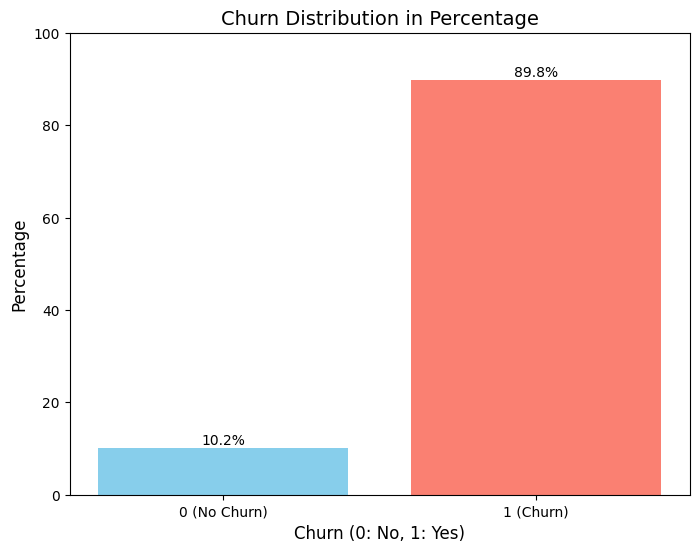

In [166]:
import pandas as pd
import matplotlib.pyplot as plt


# Hitung jumlah dan persentase
churn_counts = df['Churn'].value_counts().sort_index()  # Urutkan index agar 0 dan 1
churn_percentage = churn_counts / churn_counts.sum() * 100

# Plot data
plt.figure(figsize=(8, 6))
bars = plt.bar(churn_percentage.index, churn_percentage, color=['skyblue', 'salmon'])

# Tambahkan persentase di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Label dan judul
plt.title('Churn Distribution in Percentage', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.xticks([0, 1], ['0 (No Churn)', '1 (Churn)'])
plt.ylim(0, 100)
plt.show()


Handle imbalance with SMOTE

In [167]:
# Convert to numeric
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [168]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

Churn
1    66661
0    66661
Name: count, dtype: int64


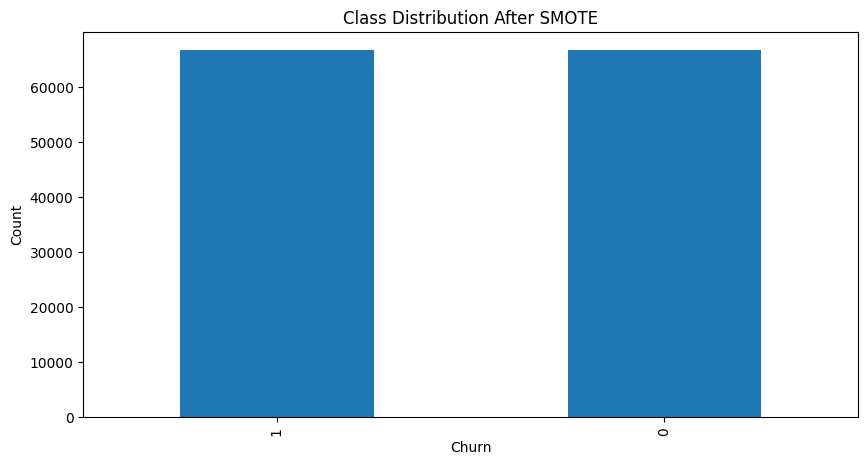

In [169]:
# Value counts
print(y_train_resampled.value_counts())

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [170]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.fit_transform(X_test_resampled)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

# Check dimensions and explained variance
print("Original dimensions:", X_train.shape[1])
print("PCA dimensions:", X_train_pca.shape[1])
print("Explained variance ratio:", sum(pca.explained_variance_ratio_))

Original dimensions: 19
PCA dimensions: 15
Explained variance ratio: 0.961964393642685


# Modeling

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from datetime import datetime as dt



from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.feature_selection import RFE

from warnings import filterwarnings
filterwarnings('ignore')

## Logit Regression

In [172]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train_resampled)

LogisticRegression()

In [173]:
y_pred = logreg.predict(X_test_pca)

In [174]:
# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test_resampled, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.51      0.63     16665
           1       0.65      0.89      0.75     16665

    accuracy                           0.70     33330
   macro avg       0.74      0.70      0.69     33330
weighted avg       0.74      0.70      0.69     33330


Confusion Matrix:
[[ 8555  8110]
 [ 1766 14899]]
